In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, minmax_scale

# Para la validación cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from itertools import cycle
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot

import statsmodels.api as sm

import statsmodels.formula.api as smf

import math

import shap

from imblearn.over_sampling import SMOTE


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 120

In [4]:
info_estudiantes=pd.read_csv('./datos/informacion_por_estudiante_de_IP.csv')
envios=pd.read_csv('./datos/todos_los_envios.csv')
problemas= pd.read_csv('./datos/todos_problemas.csv')
estudiantes_seccion = pd.read_csv('./datos/todos_estudiantes_seccion.csv')
tareas = pd.read_csv('./datos/todo_tareas.csv')
problemas_tareas= pd.read_csv('./datos/todo_problemas_tareas.csv')
resultado_estudiante= pd.read_csv('./datos/todo_resultado_estudiante.csv')
resultado_tarea= pd.read_csv('./datos/todo_resultados_tareas.csv')
secciones= pd.read_csv('./datos/todo_seccion.csv')


info_estudiante_con_puntos_por_nivel = pd.read_csv('./datos/estudiante_puntos_por_nivel_y_siesono_tarea.csv')

In [5]:
(info_estudiantes[info_estudiantes['n4_global'] <=0].count())['puntos']

4248

In [6]:
type(info_estudiantes.columns)

pandas.core.indexes.base.Index

In [7]:
# info_estudiantes

In [8]:
info_estudiantes.isnull().sum()

id                            0
login                         0
nombre                        0
avatar                       49
tipo                          0
                           ... 
saber_v2_lecturacritica    6540
saber_v2_socialesciudad    6540
anio_grado                 6533
precalculo                 7924
mascara                       0
Length: 136, dtype: int64

In [9]:
#Columnas que tienen tantos nulos que no tienen un valor estadístico claro:
# password                      7926
# fecha_nacimiento              6519
# sexo                          6535
# colegio                       6522
# colegio_codigo                6522
# saber_v1                      7919
# saber_v2                      6540
# mate1203                      7920
# leng1501                      7921
# lite1611                      7924
# huma1300                      7926
# programa_codigo               1849
# programa_doble                7285
# creditos_inscritos            6718
# semestre_segun_creditos       6538
# observaciones                 7926
# retiro_banner_fecha           7926
# definitiva_banner             5227
# retiro_banner                 4584
# porcentaje_inasistencias      6466
# tipo_riesgo_deca              6206
# spadies                       6208
# riesgo_disc                   7926
# saber_biologia                7919
# saber_ciencias                7919
# saber_filosofia               7919
# saber_fisica                  7919
# saber_lenguajes               7919
# saber_quimica                 7919
# saber_matematicas             6533
# saber_v2_cienciasnaturales    6540
# saber_v2_ingles               6540
# saber_v2_lecturacritica       6540
# saber_v2_socialesciudad       6540
# anio_grado                    6533
# precalculo                    7924

In [10]:
info_estudiantes['retiro'].fillna(value="NR", inplace=True)

In [11]:
info_estudiantes['retiroOno'] = np.where((info_estudiantes['retiro']=='NR'),1,0)

In [12]:
info_estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7926 entries, 0 to 7925
Columns: 137 entries, id to retiroOno
dtypes: float64(72), int32(1), int64(42), object(22)
memory usage: 8.3+ MB


In [13]:
# n1_teorico   +n2_teorico   +n3_teorico   +n4_teorico   +n1_ejercicio +n2_ejercicio +n3_ejercicio +n4_ejercicio +n1_anulacion +n2_anulacion +n3_anulacion +n4_anulacion +n1_practico  +n2_practico  +n3_practico  +n4_practico  +actividades_1+actividades_2+n1_fallas    +n2_fallas    +n3_fallas    +n4_fallas    +n1_global    +n2_global    +n3_global    +n4_global

In [14]:
lm1 = smf.ols(formula = 'n1_teorico ~ puntos+n2_teorico+n3_teorico+n4_teorico+n1_ejercicio+n2_ejercicio+n3_ejercicio+n4_ejercicio+n1_anulacion+n2_anulacion+n3_anulacion+n4_anulacion+n1_practico+n2_practico+n3_practico+n4_practico+actividades_1+actividades_2+n1_fallas+n2_fallas+n3_fallas+n4_fallas+n1_global+n2_global+n3_global+n4_global', data=info_estudiantes).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n1_teorico   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     4226.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        04:18:44   Log-Likelihood:                -5170.4
No. Observations:                7926   AIC:                         1.039e+04
Df Residuals:                    7901   BIC:                         1.057e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1108      0.013      8.537      0.000       0.085       0.136
puntos        -4.114e-05   3.45e-05     -1.194      0.232      -0.000    2.64e-05
n2_teorico        0.1269      0.012     10.262      0.000       0.103       0.151
n3_teorico        0.0566      0.030      1.914      0.056      -0.001       0.115
n4_teorico        0.2361      0.076      3.103      0.002       0.087       0.385
n1_ejercicio      0.0626      0.004     14.232      0.000       0.054       0.071
n2_ejercicio     -0.0037      0.004     -0.890      0.374      -0.012       0.005
n3_ejercicio     -0.0089      0.005     -1.970      0.049      -0.018   -4.52e-05
n4_ejercicio     -0.0167      0.005     -3.124      0.002      -0.027      -0.006
n1_anulacion     -0.2175      0.023     -9.491      0.000      -0.262      -0.173
n2_anulacion      0.0233      0.021      1.098      0.272      -0.018       0.065
n3_anulacion     -0.1010      0.026     -3.827      0.000      -0.153      -0.049
n4_anulacion     -0.0443      0.027     -1.656      0.098      -0.097       0.008
n1_practico       0.8371      0.005    153.513      0.000       0.826       0.848
n2_practico      -0.0517      0.012     -4.349      0.000      -0.075      -0.028
n3_practico      -0.0093      0.029     -0.316      0.752      -0.067       0.048
n4_practico      -0.2557      0.076     -3.372      0.001      -0.404      -0.107
actividades_1 -9.284e-16   4.45e-16     -2.085      0.037    -1.8e-15   -5.56e-17
actividades_2 -1.078e-17   6.62e-18     -1.629      0.103   -2.38e-17    2.19e-18
n1_fallas         0.0123      0.009      1.342      0.179      -0.006       0.030
n2_fallas        -0.0030      0.005     -0.637      0.524      -0.012       0.006
n3_fallas         0.0314      0.013      2.470      0.014       0.006       0.056
n4_fallas        -0.0022      0.010     -0.221      0.825      -0.022       0.017
n1_global         0.0208      0.002      9.000      0.000       0.016       0.025
n2_global        -0.0367      0.008     -4.749      0.000      -0.052      -0.022
n3_global        -0.0309      0.011     -2.839      0.005      -0.052      -0.010
n4_global         0.0365      0.012      2.975      0.003       0.012       0.061
==============================================================================
Omnibus:                     2426.214   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119438.975
Skew:                           0.696   Prob(JB):                         0.00
Kurtosis:                      21.966   Cond. No.                     1.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-24. This mig

In [15]:
lm1 = smf.ols(formula = 'n1_global ~ puntos+n2_teorico+n3_teorico+n4_teorico+n1_ejercicio+n2_ejercicio+n3_ejercicio+n4_ejercicio+n1_anulacion+n2_anulacion+n3_anulacion+n4_anulacion+n1_practico+n2_practico+n3_practico+n4_practico+actividades_1+actividades_2+n1_fallas+n2_fallas+n3_fallas+n4_fallas+n2_global+n3_global+n4_global', data=info_estudiantes).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n1_global   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     643.5
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        04:18:44   Log-Likelihood:                -17697.
No. Observations:                7926   AIC:                         3.544e+04
Df Residuals:                    7902   BIC:                         3.561e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7863      0.062    -12.599      0.000      -0.909      -0.664
puntos           -0.0007      0.000     -4.223      0.000      -0.001      -0.000
n2_teorico       -0.9888      0.059    -16.759      0.000      -1.105      -0.873
n3_teorico       -0.4170      0.144     -2.906      0.004      -0.698      -0.136
n4_teorico        1.1596      0.369      3.140      0.002       0.436       1.884
n1_ejercicio      0.2004      0.021      9.436      0.000       0.159       0.242
n2_ejercicio     -0.0032      0.020     -0.158      0.874      -0.043       0.037
n3_ejercicio     -0.2962      0.022    -13.649      0.000      -0.339      -0.254
n4_ejercicio      0.4145      0.026     16.200      0.000       0.364       0.465
n1_anulacion     -0.0485      0.111     -0.436      0.663      -0.267       0.170
n2_anulacion     -0.0004      0.103     -0.004      0.997      -0.202       0.201
n3_anulacion      0.5979      0.128      4.670      0.000       0.347       0.849
n4_anulacion     -0.2752      0.130     -2.118      0.034      -0.530      -0.020
n1_practico       0.8992      0.024     36.741      0.000       0.851       0.947
n2_practico      -0.6376      0.057    -11.136      0.000      -0.750      -0.525
n3_practico      -0.0785      0.143     -0.550      0.582      -0.358       0.201
n4_practico       0.6433      0.368      1.747      0.081      -0.079       1.365
actividades_1 -6.663e-17   6.57e-17     -1.015      0.310   -1.95e-16    6.21e-17
actividades_2 -4.163e-16   5.43e-16     -0.767      0.443   -1.48e-15    6.47e-16
n1_fallas         0.1306      0.045      2.933      0.003       0.043       0.218
n2_fallas        -0.0680      0.023     -2.982      0.003      -0.113      -0.023
n3_fallas         0.0154      0.062      0.249      0.803      -0.106       0.137
n4_fallas         0.0542      0.048      1.131      0.258      -0.040       0.148
n2_global         1.8174      0.032     57.666      0.000       1.756       1.879
n3_global         0.8634      0.052     16.639      0.000       0.762       0.965
n4_global        -2.4239      0.053    -45.779      0.000      -2.528      -2.320
==============================================================================
Omnibus:                     2825.207   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           766962.924
Skew:                           0.413   Prob(JB):                         0.00
Kurtosis:                      51.184   Cond. No.                     1.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-24. This might indicate that there are
strong multicollinearity problems or that the design ma

# Prueba con datos procesados OLS

In [16]:
info_estudiante_con_puntos_por_nivel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21110 entries, 0 to 21109
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   est_sem_id           21110 non-null  int64  
 1   nivel                21110 non-null  int64  
 2   Asoc_tarea           21110 non-null  int64  
 3   puntos               21110 non-null  int64  
 4   estudiante_id        21110 non-null  int64  
 5   programa             20968 non-null  object 
 6   generacion_e         21110 non-null  int64  
 7   riesgo_deca          12593 non-null  float64
 8   tipo_riesgo_deca     5408 non-null   object 
 9   spadies              5406 non-null   float64
 10  n1_global            21110 non-null  float64
 11  n2_global            21110 non-null  float64
 12  n3_global            21110 non-null  float64
 13  n4_global            21110 non-null  float64
 14  n1_practico          21110 non-null  float64
 15  n2_practico          21110 non-null 

In [17]:
info_estudiante_con_puntos_por_nivel['siPasa']= np.where(info_estudiante_con_puntos_por_nivel['definitiva_profesor']>=3.0,1,0)

In [18]:
info_estudiante_con_puntos_por_nivel['riesgo_deca']= info_estudiante_con_puntos_por_nivel['riesgo_deca'].fillna(value=0)

In [19]:
info_estudiante_con_puntos_por_nivel['riesgo_deca'].describe()

count    21110.000000
mean         0.256182
std          0.436534
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: riesgo_deca, dtype: float64

In [20]:
string = ""
for i in info_estudiante_con_puntos_por_nivel.columns:
    string=string+ i +"+"
string= string[:-1]
string

'est_sem_id+nivel+Asoc_tarea+puntos+estudiante_id+programa+generacion_e+riesgo_deca+tipo_riesgo_deca+spadies+n1_global+n2_global+n3_global+n4_global+n1_practico+n2_practico+n3_practico+n4_practico+n1_teorico+n2_teorico+n3_teorico+n4_teorico+n1_ejercicio+n2_ejercicio+n3_ejercicio+n4_ejercicio+retiro+semestre+definitiva_profesor+seccion_id+siPasa'

In [21]:
lm1 = smf.ols(formula = 'siPasa ~ nivel+Asoc_tarea+puntos+programa+generacion_e+riesgo_deca+tipo_riesgo_deca+spadies+n1_global+n2_global+n3_global+n4_global+n1_practico+n2_practico+n3_practico+n4_practico+n1_teorico+n2_teorico+n3_teorico+n4_teorico+n1_ejercicio+n2_ejercicio+n3_ejercicio+n4_ejercicio+retiro+semestre+definitiva_profesor', data=info_estudiante_con_puntos_por_nivel).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 siPasa   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     481.2
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        04:18:45   Log-Likelihood:                 1473.8
No. Observations:                5406   AIC:                            -2846.
Df Residuals:                    5355   BIC:                            -2509.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    -34.4731      6.501     -5.303      0.000     -47.218     -21.728
programa[T.ANTROPOLOGIA]                   -1.359e-10   2.56e-11     -5.303      0.000   -1.86e-10   -8.56e-11
programa[T.ARQUITECTURA]                   -1.797e-10   3.39e-11     -5.303      0.000   -2.46e-10   -1.13e-10
programa[T.ARTE]                            -7.86e-12   1.48e-12     -5.303      0.000   -1.08e-11   -4.95e-12
programa[T.BIOLOGIA]                          -1.4963      0.285     -5.248      0.000      -2.055      -0.937
programa[T.CONTADURIA INTERNACIONAL]       -5.355e-12   1.01e-12     -5.302      0.000   -7.33e-12   -3.37e-12
programa[T.DERECHO]                         5.667e-14   1.08e-14      5.227      0.000    3.54e-14    7.79e-14
programa[T.DISEÑO]                            -1.3142      0.287     -4.576      0.000      -1.877      -0.751
programa[T.DOCTORADO EN INGENIERIA]          6.42e-12   1.21e-12      5.303      0.000    4.05e-12    8.79e-12
programa[T.ECONOMIA]                          -1.3727      0.287     -4.782      0.000      -1.935      -0.810
programa[T.ESTUDIOS DIRIGIDOS]                -1.5020      0.282     -5.323      0.000      -2.055      -0.949
programa[T.ESTUDIOS GENER.DE INTERCAMBIO]   8.282e-13   1.56e-13      5.304      0.000    5.22e-13    1.13e-12
programa[T.EXTENSION]                       6.716e-13   1.27e-13      5.303      0.000    4.23e-13     9.2e-13
programa[T.EXTENSION UNIVERSITARIA]        -3.752e-13   7.08e-14     -5.297      0.000   -5.14e-13   -2.36e-13
programa[T.FILOSOFIA]                         -2.2499      0.301     -7.473      0.000      -2.840      -1.660
programa[T.FISICA]                            -1.4869      0.283     -5.256      0.000      -2.041      -0.932
programa[T.GEOCIENCIAS]                       -1.5048      0.284     -5.298      0.000      -2.062      -0.948
programa[T.GOBIERNO Y ASUNTOS PUBLICOS]     6.582e-13   1.24e-13      5.303      0.000    4.15e-13    9.01e-13
programa[T.HISTORIA]                       -2.833e-14   5.37e-15     -5.275      0.000   -3.89e-14   -1.78e-14
programa[T.HISTORIA DEL ARTE]                 -1.7289      0.292     -5.925      0.000      -2.301      -1.157
programa[T.ING. DE SISTEMAS Y COMPUTACION]    -1.4941      0.283     -5.284      0.000      -2.048      -0.940
programa[T.INGENIERIA AMBIENTAL]              -1.3850      0.283     -4.897      0.000      -1.939      -0.831
programa[T.INGENIERIA BIOMEDICA]              -1.5006      0.283     -5.305      0.000      -2.055      -0.946
programa[T.INGENIERIA DE ALIMENTOS]           -1.4010      0.285     -4.911      0.000      -1.960      -0.842
programa[T.INGENIERIA ELECTRICA]              -1.4991      0.283     -5.298      0.000

In [22]:
df_nivel1= info_estudiante_con_puntos_por_nivel[(info_estudiante_con_puntos_por_nivel['nivel']==1) & (info_estudiante_con_puntos_por_nivel['Asoc_tarea']==1)]
df_nivel2= info_estudiante_con_puntos_por_nivel[(info_estudiante_con_puntos_por_nivel['nivel']==2) & (info_estudiante_con_puntos_por_nivel['Asoc_tarea']==1)]
df_nivel3= info_estudiante_con_puntos_por_nivel[(info_estudiante_con_puntos_por_nivel['nivel']==3) & (info_estudiante_con_puntos_por_nivel['Asoc_tarea']==1)]
df_nivel4=info_estudiante_con_puntos_por_nivel[(info_estudiante_con_puntos_por_nivel['nivel']==4) & (info_estudiante_con_puntos_por_nivel['Asoc_tarea']==1)]

In [23]:
df_nivel11= (info_estudiante_con_puntos_por_nivel[(info_estudiante_con_puntos_por_nivel['nivel']==1) & (info_estudiante_con_puntos_por_nivel['Asoc_tarea']==0)])
df_nivel22=info_estudiante_con_puntos_por_nivel[(info_estudiante_con_puntos_por_nivel['nivel']==2) & (info_estudiante_con_puntos_por_nivel['Asoc_tarea']==0)]
df_nivel33= info_estudiante_con_puntos_por_nivel[(info_estudiante_con_puntos_por_nivel['nivel']==3) & (info_estudiante_con_puntos_por_nivel['Asoc_tarea']==0)]
df_nivel44=info_estudiante_con_puntos_por_nivel[(info_estudiante_con_puntos_por_nivel['nivel']==4) & (info_estudiante_con_puntos_por_nivel['Asoc_tarea']==0)]

In [24]:
lm1 = smf.ols(formula = 'n4_global ~ puntos+programa+riesgo_deca', data=df_nivel44).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n4_global   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     6.865
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           7.64e-22
Time:                        04:18:45   Log-Likelihood:                -1088.2
No. Observations:                 551   AIC:                             2234.
Df Residuals:                     522   BIC:                             2360.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      1.3365      0.801      1.668      0.096      -0.238       2.911
programa[T.ARQUITECTURA]                      -1.3365      1.499     -0.892      0.373      -4.281       1.608
programa[T.BIOLOGIA]                           0.0064      0.906      0.007      0.994      -1.773       1.786
programa[T.DERECHO]                            2.9121      1.963      1.484      0.139      -0.944       6.768
programa[T.DISEÑO]                            -1.4172      1.963     -0.722      0.471      -5.273       2.438
programa[T.ECONOMIA]                          -0.2857      0.966     -0.296      0.768      -2.184       1.613
programa[T.ESTUDIOS DIRIGIDOS]                 1.1819      1.026      1.152      0.250      -0.834       3.197
programa[T.FISICA]                             0.3686      0.865      0.426      0.670      -1.330       2.068
programa[T.GEOCIENCIAS]                        0.4203      0.970      0.433      0.665      -1.486       2.327
programa[T.ING. DE SISTEMAS Y COMPUTACION]    -0.0469      0.829     -0.057      0.955      -1.675       1.581
programa[T.INGENIERIA AMBIENTAL]               0.3806      0.925      0.411      0.681      -1.437       2.199
programa[T.INGENIERIA BIOMEDICA]               0.3718      0.850      0.437      0.662      -1.298       2.042
programa[T.INGENIERIA DE ALIMENTOS]            0.8821      1.503      0.587      0.557      -2.070       3.834
programa[T.INGENIERIA ELECTRICA]              -0.4257      1.089     -0.391      0.696      -2.565       1.714
programa[T.INGENIERIA ELECTRONICA]             0.3032      0.894      0.339      0.735      -1.453       2.060
programa[T.INGENIERIA INDUSTRIAL]              0.1397      0.828      0.169      0.866      -1.486       1.766
programa[T.INGENIERIA MECANICA]                0.9648      0.838      1.151      0.250      -0.682       2.612
programa[T.INGENIERIA QUIMICA]                 0.1157      0.854      0.135      0.892      -1.562       1.793
programa[T.INGENIERIA CIVIL]                 -1.4159      0.878     -1.613      0.107      -3.140       0.309
programa[T.INGENIERÍA CIVIL]                   1.2715      0.846      1.503      0.133      -0.390       2.933
programa[T.LITERATURA]                        -1.4011      1.963     -0.714      0.476      -5.257       2.455
programa[T.MATEMATICAS]                       -0.5894      1.090     -0.541      0.589      -2.730       1.551
programa[T.MEDICINA]                           2.4735      1.963      1.260      0.208      -1.382       6.329
programa[T.MICROBIOLOGIA]                      0.5896      0.885      0.666      0.506      -1.149       2.328
programa[T.NARRATIVAS DIGITALES]              -1.3849      1.963     -0.706      0.481

In [25]:
#Terminar tratamiento de excels. (Listo)

# Solo los 1500 con icfes , luego combinar esto más encuestas y finalmente solo encuestas. (Falta juntar icfes con encuestas)

#Intentar con el subconjunto que se tiene la información previa con los 1400 estudiantes aprox. Si pasa o no pasa. (Listo)

#Predecir (Listo)
#Normalizar para el clasificador Regresión.(Listo)

#Random Forest sklearn. (50%)

#Analisis SHAP. (Conocer las caracteristicas más importantes) (LIsto)

#Hacer una presentacion con los analisis hechos. (falta )

#Documentar TODO LO REALIZADO. (70%)
#que data se utilizó, se excluyó
#
#Discusión
# Lo anterior , en el documento de la tesis.


# Predicción pasa o no pasa la materia a partir de los datos obtenidos en las encuestas al inicio del curso

## Carga de datos y Limpieza de Datos

In [26]:
encuestas= pd.read_excel('./datos/todo_encuestas2.xlsx')
estudiantes= pd.read_csv('./datos/todo_estudiantes_ip_nombres.csv')

In [27]:
def ponerEnLowerCase(p):
    if isinstance(p, float):
        return ""
    else:
        return p.lower()

In [28]:
estudiantes['Estudiante'] = estudiantes['nombres'] + " " + estudiantes['apellidos']
estudiantes['Estudiante'] = estudiantes['Estudiante'].apply(ponerEnLowerCase)
estudiantes['semestre'] = estudiantes['semestre'].astype(str)
estudiantes['IdentificadorUnico'] =  estudiantes['semestre'] + estudiantes['Estudiante']

In [29]:
encuestas['Estudiante'] = encuestas['Estudiante'].apply(ponerEnLowerCase)
encuestas['SemestreAct'] = encuestas['SemestreAct'].astype(str)
encuestas['IdentificadorUnico'] =  encuestas['SemestreAct'] + encuestas['Estudiante']

In [30]:
estudiantes

,id,semestre,curso,codigo,login,apellidos,nombres,fecha_nacimiento,sexo,colegio,colegio_codigo,saber_v1,saber_v2,mate1203,leng1501,lite1611,huma1300,programa,programa_codigo,programa_doble,creditos_inscritos,semestre_segun_creditos,spp,generacion_e,curso_nombre,veces_visto,seccion,profesor,profesor_correo,asistencias_ctm1,asistencias_ctm2,asistencias_ctm3,asistencias_ctm4,asistencias_ctm5,asistencias_ctm6,observaciones,n1_teorico,n2_teorico,n3_teorico,n4_teorico,n5_teorico,n6_teorico,n1_ejercicio,n2_ejercicio,n3_ejercicio,n4_ejercicio,n5_ejercicio,n6_ejercicio,n1_anulacion,n2_anulacion,n3_anulacion,n4_anulacion,n5_anulacion,n6_anulacion,n1_practico,n2_practico,n3_practico,n4_practico,n5_practico,n6_practico,actividades_1,actividades_2,n1_fallas,n2_fallas,n3_fallas,n4_fallas,n5_fallas,n6_fallas,n1_global,n2_global,n3_global,n4_global,n5_global,n6_global,retiro,definitiva_profesor,retiro_banner,retiro_banner_fecha,definitiva_banner,n1_t,n2_t,n3_t,n4_t,n5_t,n6_t,n1_e,n2_e,n3_e,n4_e,n5_e,n6_e,n1_l,n2_l,n3_l,n4_l,n5_l,n6_l,n1,n2,n3,n4,n5,n6,act_1,act_2,activo,porcentaje_inasistencias,pga,riesgo_deca,tipo_riesgo_deca,spadies,riesgo_disc,saber_biologia,saber_ciencias,saber_filosofia,saber_fisica,saber_lenguajes,saber_quimica,saber_matematicas,saber_v2_cienciasnaturales,saber_v2_ingles,saber_v2_lecturacritica,saber_v2_socialesciudad,anio_grado,precalculo,Estudiante,IdentificadorUnico
0,32975,201910,ISIS 1221,201714491,mc.quevedo,QUEVEDO GOMEZ,MARIA CAMILA,1999-04-20,F,INST EDUC SAN ISIDRO,123927.0,NaN,365.0,3.2,4.30,NaN,NaN,INGENIERIA QUIMICA,IQUI,NaN,18.0,2.13,1,0,INTRODUCCION A LA PROGRAMACION,0,1.0,HERNANDEZ HOYOS MARCELA,marc-her@uniandes.edu.co,0,0,0,0,0,0,NaN,4.00,4.17,0.00,0.00,0,0,5.00,4.20,0.00,0.00,0,0,0,0,0,0,0,0,3.95,4.35,0.00,0.00,0,0,0,0,2,2,0,0,0,0,3.99,4.33,0.00,0.00,0,0,r,0.0,NaN,NaN,NaN,0.05,0.14,0.13,0.07,0.07,0.14,0.01,0.02,0.02,0.02,0.02,0.05,0.04,0.04,0.05,0.03,0.04,0.06,0.1,0.2,0.2,0.12,0.13,0.25,0,0,0,8.889,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,71.0,76.0,74.0,72.0,20162.0,NaN,maria camila quevedo gomez,201910maria camila quevedo gomez
1,32976,201910,ISIS 1221,201731269,ma.rodriguezs2,RODRIGUEZ SANCHEZ,MARIA ALEJANDRA,1999-03-01,F,COL ABRAHAM LINCOLN,19331.0,NaN,369.0,3.0,4.15,NaN,NaN,INGENIERIA CIVIL,ICIV,NaN,20.0,2.68,0,0,INTRODUCCION A LA PROGRAMACION,0,1.0,HERNANDEZ HOYOS MARCELA,marc-her@uniandes.edu.co,0,0,1,3,0,0,NaN,3.85,2.80,0.65,0.00,0,0,4.15,4.06,4.48,3.32,0,0,0,0,1,1,0,0,4.75,3.55,1.08,4.28,0,0,0,0,0,0,1,0,0,0,4.24,3.46,0.86,1.92,0,0,NaN,0.0,0.0,NaN,2.5,0.05,0.14,0.14,0.08,0.07,0.14,0.01,0.02,0.00,0.00,0.02,0.05,0.04,0.04,0.06,0.04,0.04,0.06,0.1,0.2,0.2,0.12,0.13,0.25,0,0,1,2.222,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,71.0,83.0,69.0,79.0,20171.0,NaN,maria alejandra rodriguez sanchez,201910maria alejandra rodriguez sanchez
2,32977,201910,ISIS 1221,201812916,d.caballero,CABALLERO DURAN,DANIELA,2000-09-17,F,GIMN SAN ANGELO,128611.0,NaN,345.0,NaN,NaN,NaN,NaN,INGENIERIA MECANICA,IMEC,NaN,20.0,1.06,0,0,INTRODUCCION A LA PROGRAMACION,0,1.0,HERNANDEZ HOYOS MARCELA,marc-her@uniandes.edu.co,0,0,1,0,0,0,NaN,1.30,2.90,2.25,1.07,0,0,3.90,3.23,4.78,3.97,0,0,1,0,1,1,0,0,4.58,4.80,4.40,3.08,0,0,0,0,0,0,0,0,0,0,2.58,3.75,2.97,1.94,0,0,NaN,0.0,0.0,NaN,3.0,0.05,0.14,0.14,0.08,0.07,0.14,0.00,0.02,0.00,0.00,0.02,0.05,0.05,0.04,0.06,0.04,0.04,0.06,0.1,0.2,0.2,0.12,0.13,0.25,0,0,1,0.000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,71.0,76.0,68.0,68.0,20172.0,R,daniela caballero duran,201910daniela caballero duran
3,32978,201910,ISIS 1221,201813052,ma.casallas,CASALLAS FINO,MICHELL ALEJANDRA,2000-10-30,F,COL CELESTIN FREINET,80051.0,NaN,363.0,NaN,NaN,NaN,NaN,INGENIERIA INDUSTRIAL,IIND,NaN,18.0,0.56,1,0,INTRODUCCION A LA PROGRAMACION,0,1.0,HERNANDEZ HOYOS MARCELA,marc-her@uniandes.edu.co,0,1,1,0,0,0,NaN,2.30,2.65,0.50,0.00,0,0,3.02,4.28,2.38,0.00,0,0,0,0,1,0,0,0,3.03,4.05,1.95,0.00,0,0,0,0,0,0,2,0,0,0,2.63,2.98,1.14,0.05,0,0,NaN,0.0,0.0,NaN,1.5,0.05,0.14,0.14,0.07,0.07,0.14,0.01,0.02,0.00,0.02,0.02,0.05,0.

In [31]:
encuestas

,SemestreAct,Estudiante,Seccion,Carrera,SemestreEst,ProgramoAntes,NivelIngles,CursoProgramacionU,VioAPO1,VioAPO2,VioHerr_Comp,VioTallerPython,VioTallerR,VioIP,VioSAD,VioOtro,ProgramoEnColegio,TrabajoConJava,TrabajoConCMM,TrabajoConC,TrabajoConVB,TrabajoConJavascript,TrabajoConPython,TrabajoConArduino,TrabajoConPHP,TrabajoConHTML,TrabajoConOtro,IdentificadorUnico
0,202110,juan sebastian arias,1,ingenieria quimica,1,Verdadero,8,Falso,0,0,0,0,0,0,0,1,Verdadero,0,0,0,0,0,0,0,0,1,0,202110juan sebastian arias
1,202110,laura camila avella fonseca,1,ingenieria electrica,1,Falso,4,Falso,0,0,0,0,0,0,0,0,Falso,0,0,0,0,0,0,0,0,1,0,202110laura camila avella fonseca
2,202110,santiago ballesteros varon,1,ingenieria industrial,1,Falso,3,Falso,0,0,0,0,0,0,0,0,Falso,0,0,0,0,0,0,0,0,0,0,202110santiago ballesteros varon
3,202110,david diaz sanchez,1,fisica,1,Falso,8,Falso,0,0,0,0,0,0,0,1,Falso,0,0,0,0,0,0,0,0,0,0,202110david diaz sanchez
4,202110,carol sofia florido castro,1,ingenieria industrial,1,Falso,5,Falso,0,0,0,0,0,0,0,0,Verdadero,0,0,0,0,0,0,0,0,0,0,202110carol sofia florido castro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,202010,layla akemi castellanos pabon,40,biologia,1,Falso,5,Falso,0,0,0,0,0,0,0,0,Falso,0,0,0,0,0,0,0,0,0,0,202010layla akemi castellanos pabon
3423,202010,santiago gonzalez montealegre,40,ingenieria industrial,1,Verdadero,5,Falso,0,0,0,0,0,0,0,0,Verdadero,0,1,0,1,0,0,0,0,1,0,202010santiago gonzalez montealegre
3424,202010,jose david rueda diaz,40,ingenieria electronica,1,Falso,3,Falso,0,0,0,0,0,0,0,0,Falso,0,0,0,0,0,0,0,0,0,0,202010jose david rueda diaz
3425,202010,stefanny alexandra manrique barrera,40,ingenieria quimica,1,Falso,5,Falso,0,0,0,0,0,0,0,0,Verdadero,0,0,0,0,0,0,0,0,0,0,202010stefanny alexandra manrique barrera


In [32]:
df_prediccion_casi = pd.merge(encuestas,estudiantes,on='IdentificadorUnico')
df_prediccion_casi

,SemestreAct,Estudiante_x,Seccion,Carrera,SemestreEst,ProgramoAntes,NivelIngles,CursoProgramacionU,VioAPO1,VioAPO2,VioHerr_Comp,VioTallerPython,VioTallerR,VioIP,VioSAD,VioOtro,ProgramoEnColegio,TrabajoConJava,TrabajoConCMM,TrabajoConC,TrabajoConVB,TrabajoConJavascript,TrabajoConPython,TrabajoConArduino,TrabajoConPHP,TrabajoConHTML,TrabajoConOtro,IdentificadorUnico,id,semestre,curso,codigo,login,apellidos,nombres,fecha_nacimiento,sexo,colegio,colegio_codigo,saber_v1,saber_v2,mate1203,leng1501,lite1611,huma1300,programa,programa_codigo,programa_doble,creditos_inscritos,semestre_segun_creditos,spp,generacion_e,curso_nombre,veces_visto,seccion,profesor,profesor_correo,asistencias_ctm1,asistencias_ctm2,asistencias_ctm3,asistencias_ctm4,asistencias_ctm5,asistencias_ctm6,observaciones,n1_teorico,n2_teorico,n3_teorico,n4_teorico,n5_teorico,n6_teorico,n1_ejercicio,n2_ejercicio,n3_ejercicio,n4_ejercicio,n5_ejercicio,n6_ejercicio,n1_anulacion,n2_anulacion,n3_anulacion,n4_anulacion,n5_anulacion,n6_anulacion,n1_practico,n2_practico,n3_practico,n4_practico,n5_practico,n6_practico,actividades_1,actividades_2,n1_fallas,n2_fallas,n3_fallas,n4_fallas,n5_fallas,n6_fallas,n1_global,n2_global,n3_global,n4_global,n5_global,n6_global,retiro,definitiva_profesor,retiro_banner,retiro_banner_fecha,definitiva_banner,n1_t,n2_t,n3_t,n4_t,n5_t,n6_t,n1_e,n2_e,n3_e,n4_e,n5_e,n6_e,n1_l,n2_l,n3_l,n4_l,n5_l,n6_l,n1,n2,n3,n4,n5,n6,act_1,act_2,activo,porcentaje_inasistencias,pga,riesgo_deca,tipo_riesgo_deca,spadies,riesgo_disc,saber_biologia,saber_ciencias,saber_filosofia,saber_fisica,saber_lenguajes,saber_quimica,saber_matematicas,saber_v2_cienciasnaturales,saber_v2_ingles,saber_v2_lecturacritica,saber_v2_socialesciudad,anio_grado,precalculo,Estudiante_y
0,202110,juan sebastian arias,1,ingenieria quimica,1,Verdadero,8,Falso,0,0,0,0,0,0,0,1,Verdadero,0,0,0,0,0,0,0,0,1,0,202110juan sebastian arias,57899,202110,ISIS 1221,202114891,js.arias2,ARIAS,JUAN SEBASTIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INGENIERIA DE ALIMENTOS,IALI,NaN,NaN,NaN,0,0,INTRODUCCIÓN A LA PROGRAMACIÓN,0,1.0,Andres Felipe Melani De La Hoz,af.melani3365@uniandes.edu.co,0,3,3,3,0,0,NaN,3.15,3.45,3.75,4.35,0,0,5.00,4.64,4.51,5.00,0,0,0,0,0,0,0,0,3.15,3.45,3.75,4.35,0,0,0,0,0,0,0,0,0,0,4.07,3.87,4.02,4.45,0,0,NaN,4.12,0.0,NaN,4.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0,0,1,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,juan sebastian arias
1,202110,laura camila avella fonseca,1,ingenieria electrica,1,Falso,4,Falso,0,0,0,0,0,0,0,0,Falso,0,0,0,0,0,0,0,0,1,0,202110laura camila avella fonseca,57885,202110,ISIS 1221,202110719,l.avella,AVELLA FONSECA,LAURA CAMILA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INGENIERIA ELECTRICA,IELE,NaN,NaN,NaN,0,0,INTRODUCCIÓN A LA PROGRAMACIÓN,0,1.0,Andres Felipe Melani De La Hoz,af.melani3365@uniandes.edu.co,3,6,8,6,0,0,NaN,1.25,3.40,2.00,2.70,0,0,4.90,4.60,4.19,3.86,0,0,1,0,1,0,0,0,1.25,3.40,2.00,2.70,0,0,0,0,0,0,0,0,0,0,1.62,3.83,2.34,3.05,0,0,R,2.85,1.0,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0,0,1,NaN,0,1.0,PRIM,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,laura camila avella fonseca
2,202110,santiago ballesteros varon,1,ingenieria industrial,1,Falso,3,Falso,0,0,0,0,0,0,0,0,Falso,0,0,0,0,0,0,0,0,0,0,202110santiago ballesteros varon,57886,202110,ISIS 1221,202110747,s.ballesterosv,BALLESTEROS VARON,SANTIAGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INGENIERIA INDUSTRIAL,IIND,NaN,NaN,NaN,0,0,INTRODUCCIÓN A LA PROGRAMACIÓN,0,1.0,Andres Felipe Melani De La Hoz,af.melani3365@uniandes.edu.co,0,0,0,0,0,0,NaN,2.85,1.00,4.85,4.70,0,0,5.00,3.82,4.66,5.00,0,0,1,1,0,0,0,0,2.85,1.00,4.85,4.70,0,0,0,0,0,0,0,0,0,0,2.62,1.27,4.84,4.75,0,0,NaN,3.70,0.0,NaN,3.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0,0,1,NaN,

In [33]:
df_prediccion_casi_analisis_5= df_prediccion_casi.copy()

In [34]:
# for i in df_prediccion_casi.columns:
#     print(i)

In [35]:
df_final=df_prediccion_casi[['SemestreAct','Carrera','SemestreEst','ProgramoAntes','NivelIngles','CursoProgramacionU','VioAPO1','VioAPO2','VioHerr_Comp','VioTallerPython','VioTallerR','VioIP','VioSAD','VioOtro','ProgramoEnColegio',
                      'TrabajoConJava','TrabajoConCMM','TrabajoConC','TrabajoConVB','TrabajoConJavascript','TrabajoConPython','TrabajoConArduino','TrabajoConPHP','TrabajoConHTML','TrabajoConOtro','n1_global','n2_global','n3_global','n4_global','definitiva_profesor']].copy()

In [36]:
cols_revisar= ['VioAPO1','VioAPO2','VioHerr_Comp','VioTallerPython','VioTallerR','VioIP','VioSAD','VioOtro',
                      'TrabajoConJava','TrabajoConCMM','TrabajoConC','TrabajoConVB','TrabajoConJavascript','TrabajoConPython','TrabajoConArduino','TrabajoConPHP','TrabajoConHTML','TrabajoConOtro']
cols_vio= ['VioAPO1','VioAPO2','VioHerr_Comp','VioTallerPython','VioTallerR','VioIP','VioSAD','VioOtro']
df_final = df_final[df_final['SemestreEst']!=-1].copy()
df_final = df_final[df_final['NivelIngles']!="No responde"].copy()
for i in cols_revisar:
    df_final[i] = np.where(df_final[i]>=1,1,np.where(df_final[i]==0,0,-1))
for i in cols_vio:
    df_final = df_final[df_final[i]!=-1].copy()
    

In [37]:
df_final['ProgramoAntes'] = np.where(df_final['ProgramoAntes']=="Verdadero",1,0)
df_final['CursoProgramacionU'] = np.where(df_final['CursoProgramacionU']=="Verdadero",1,0)
df_final['ProgramoEnColegio'] = np.where(df_final['ProgramoEnColegio']=="Verdadero",1,0)
df_final['PasoONo'] = np.where(df_final['definitiva_profesor']>=3.0,1,0)

In [38]:
# df_final.groupby(by="ProgramoEnColegio").count()

In [39]:
carreras = pd.get_dummies(df_final.Carrera, prefix='Carrera')
nivel_Ingles = pd.get_dummies(df_final.NivelIngles, prefix='NivelIngles')
semestre_est = pd.get_dummies(df_final.SemestreEst, prefix='SemestreEst')

In [40]:
df_final_f=df_final.drop(columns=['Carrera', 'NivelIngles','SemestreEst','definitiva_profesor'])

In [41]:
df_final_f_f = pd.concat([df_final_f,carreras, nivel_Ingles,semestre_est], axis=1)

In [42]:
df_final_f_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 2600
Data columns (total 87 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SemestreAct                            2033 non-null   object 
 1   ProgramoAntes                          2033 non-null   int32  
 2   CursoProgramacionU                     2033 non-null   int32  
 3   VioAPO1                                2033 non-null   int32  
 4   VioAPO2                                2033 non-null   int32  
 5   VioHerr_Comp                           2033 non-null   int32  
 6   VioTallerPython                        2033 non-null   int32  
 7   VioTallerR                             2033 non-null   int32  
 8   VioIP                                  2033 non-null   int32  
 9   VioSAD                                 2033 non-null   int32  
 10  VioOtro                                2033 non-null   int32  
 11  Prog

In [43]:
df_final_f_f.describe()

,ProgramoAntes,CursoProgramacionU,VioAPO1,VioAPO2,VioHerr_Comp,VioTallerPython,VioTallerR,VioIP,VioSAD,VioOtro,ProgramoEnColegio,TrabajoConJava,TrabajoConCMM,TrabajoConC,TrabajoConVB,TrabajoConJavascript,TrabajoConPython,TrabajoConArduino,TrabajoConPHP,TrabajoConHTML,TrabajoConOtro,n1_global,n2_global,n3_global,n4_global,PasoONo,Carrera_administracion de empresas,Carrera_antropologia,Carrera_arquitectura,Carrera_arte,Carrera_biologia,Carrera_contaduria internacional,Carrera_derecho,Carrera_diseño,Carrera_economia,Carrera_estudios dirigidos,Carrera_estudios generde intercambio,Carrera_filosofia,Carrera_fisica,Carrera_geociencias,Carrera_gobierno y asuntos publicos,Carrera_historia,Carrera_ing de sistemas y computacion,Carrera_ingenieria ambiental,Carrera_ingenieria biomedica,Carrera_ingenieria civil,Carrera_ingenieria de alimentos,Carrera_ingenieria electrica,Carrera_ingenieria electronica,Carrera_ingenieria industrial,Carrera_ingenieria mecanica,Carrera_ingenieria quimica,Carrera_lenguas y cultura,Carrera_literatura,Carrera_matematicas,Carrera_medicina,Carrera_musica,Carrera_narrativas digitales,Carrera_programa basico ingenieria,Carrera_psicologia,Carrera_quimica,NivelIngles_1,NivelIngles_2,NivelIngles_3,NivelIngles_4,NivelIngles_5,NivelIngles_6,NivelIngles_7,NivelIngles_8,NivelIngles_1,NivelIngles_2,NivelIngles_3,NivelIngles_4,NivelIngles_5,NivelIngles_6,NivelIngles_7,NivelIngles_8,SemestreEst_1,SemestreEst_2,SemestreEst_3,SemestreEst_4,SemestreEst_5,SemestreEst_6,SemestreEst_7,SemestreEst_8,SemestreEst_9
count,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000
mean,0.587309,0.194294,0.054107,0.002459,0.001968,0.011805,0.002459,0.137236,0.000984,0.115593,0.524348,0.170684,0.145598,0.024594,0.069848,0.113625,0.250861,0.230694,0.025578,0.303000,0.120020,4.042597,3.683711,3.280890,2.534966,0.438269,0.008362,0.000492,0.001968,0.002459,0.069848,0.000984,0.001968,0.005411,0.019675,0.015248,0.000492,0.000984,0.082636,0.025086,0.001476,0.000492,0.151008,0.023610,0.070831,0.080177,0.006394,0.012297,0.060010,0.162322,0.096409,0.055091,0.000492,0.000492,0.018200,0.001476,0.000492,0.000984,0.000492,0.001476,0.020167,0.000984,0.001968,0.029021,0.024594,0.110674,0.041810,0.091490,0.000492,0.001476,0.003935,0.037875,0.044270,0.107723,0.113625,0.101328,0.288736,0.560256,0.188883,0.140679,0.049188,0.029021,0.014757,0.006886,0.007870,0.002459
std,0.492439,0.395754,0.226285,0.049544,0.044324,0.108035,0.049544,0.344181,0.031357,0.319815,0.499530,0.376325,0.352789,0.154923,0.254953,0.317434,0.433615,0.421380,0.157911,0.459668,0.325064,2.633237,1.619486,1.842140,2.087242,0.496297,0.091083,0.022178,0.044324,0.049544,0.254953,0.031357,0.044324,0.073376,0.138916,0.122569,0.022178,0.031357,0.275400,0.156425,0.038395,0.022178,0.358145,0.151869,0.256606,0.271634,0.079729,0.110235,0.237564,0.368836,0.295224,0.228214,0.022178,0.022178,0.133706,0.038395,0.022178,0.031357,0.022178,0.038395,0.140607,0.031357,0.044324,0.167907,0.154923,0.313805,0.200204,0.288376,0.022178,0.038395,0.062622,0.19094

## Limpieza de datos

In [44]:
df_final_f_f['VioAPO1'].value_counts()

0    1923
1     110
Name: VioAPO1, dtype: int64

In [45]:
df_final_f_f['PasoONo'].value_counts()

0    1142
1     891
Name: PasoONo, dtype: int64

## Selección de subdatasets

In [46]:
# hist = df_final_f_f['definitiva_profesor'].hist(bins=10)

In [47]:
#Standar Scaler - Probar , Estandarizar train luego de dividir entre train (fit_transform) y test(transform), probar con SVM - SVC 

In [48]:
x_drop=df_final_f_f.drop(['PasoONo','n1_global','n2_global','n3_global','n4_global','SemestreAct'],1)
feature_names= x_drop.columns
X = np.array(x_drop)
y = np.array(df_final_f_f['PasoONo'])

## SMOTE

In [49]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

## Estandarización

In [50]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [51]:
t_columns= feature_names.union(pd.Index(['PasoONo']),sort=False)

In [52]:
ss = StandardScaler()
X_tr_df= pd.DataFrame(X_train,columns=feature_names)
y_tr_df= pd.DataFrame(y_train,columns=['PasoONo'])
train_comp= pd.concat([X_tr_df,y_tr_df],1)

X_te_df= pd.DataFrame(X_test,columns=feature_names)
y_te_df= pd.DataFrame(y_test,columns=['PasoONo'])
test_comp= pd.concat([X_te_df,y_te_df],1)

# Estandarizacion X_train
X_train_estd = ss.fit_transform(train_comp)
X_train_estd = pd.DataFrame(X_train_estd,columns=train_comp.columns)

# Estandarizacion X_test
X_test_estd = ss.transform(test_comp)
X_test_estd = pd.DataFrame(X_test_estd,columns=test_comp.columns)

#Separar de nuevo X's y y's
X_train= np.array(X_train_estd.drop(['PasoONo'],1))
X_test= np.array(X_test_estd.drop(['PasoONo'],1))
# y_train= np.array(X_train_estd['PasoONo'])
# y_test= np.array(X_test_estd['PasoONo'])


## Creación Regresión Logistica

### Búsqueda Hiperparámetros

In [53]:
estratos = StratifiedKFold(n_splits=10,random_state=1001,shuffle=True)
ols = linear_model.LogisticRegression(random_state=1001)
param_grid = {
'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'penalty' : ['l2'],
'C': [100, 10, 1.0, 0.1, 0.01]
}

mejor_modelo = GridSearchCV(ols, param_grid, cv=estratos)
mejor_modelo.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1001, shuffle=True),
             estimator=LogisticRegression(random_state=1001),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [54]:
mejor_modelo.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}

In [55]:
 # Obtener el mejor modelo.
model = mejor_modelo.best_estimator_

In [56]:
model.score(X_test,y_test)

0.7303206997084548

In [57]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=1001,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.665216 (0.037963)


In [58]:
predictions_train = model.predict(X_train)
print(accuracy_score(y_train, predictions_train))

0.7127659574468085


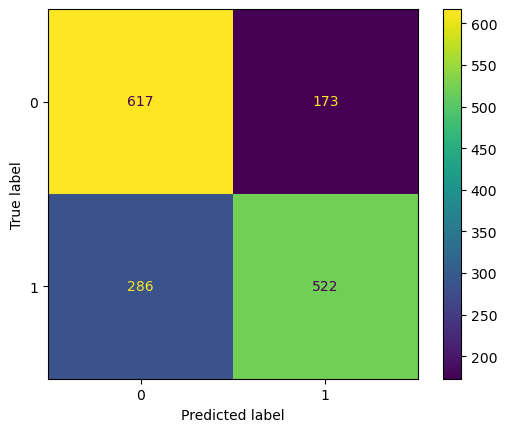

In [59]:
plot_confusion_matrix(model,X_train,y_train)

In [60]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       790
           1       0.75      0.65      0.69       808

    accuracy                           0.71      1598
   macro avg       0.72      0.71      0.71      1598
weighted avg       0.72      0.71      0.71      1598



In [61]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7303206997084548


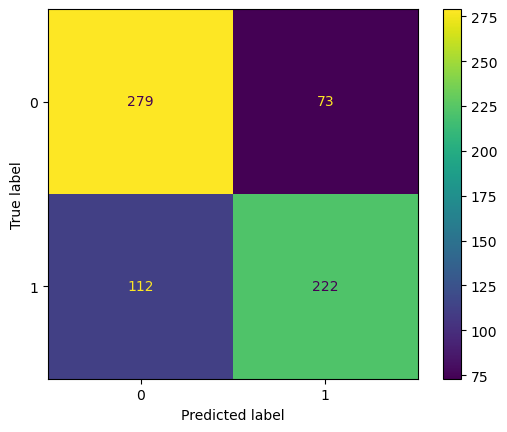

In [62]:
plot_confusion_matrix(model,X_test,y_test)

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       352
           1       0.75      0.66      0.71       334

    accuracy                           0.73       686
   macro avg       0.73      0.73      0.73       686
weighted avg       0.73      0.73      0.73       686



In [64]:
def valorAbsoluto(num):
    return abs(num)

In [65]:
importances = pd.DataFrame(data={
    'Attribute': feature_names,
    'Importance': model.coef_[0]
})
importances['Importance']=importances['Importance'].apply(valorAbsoluto)
importances = importances.sort_values(by='Importance', ascending=False)

In [66]:
importances

,Attribute,Importance
71,NivelIngles_8,1.348311
68,NivelIngles_5,0.890363
69,NivelIngles_6,0.875329
72,SemestreEst_1,0.798238
70,NivelIngles_7,0.737170
44,Carrera_ingenieria industrial,0.728319
37,Carrera_ing de sistemas y computacion,0.701364
45,Carrera_ingenieria mecanica,0.684315
67,NivelIngles_4,0.633249
40,Carrera_ingenieria civil,0.620243


In [67]:
feature_imp = pd.Series(model.coef_[0],index=feature_names).sort_values(ascending=False)
feature_imp

Carrera_medicina                         0.167753
VioOtro                                  0.155462
Carrera_antropologia                     0.125392
NivelIngles_8                            0.095451
VioAPO2                                  0.081156
Carrera_estudios generde intercambio     0.073344
TrabajoConPHP                            0.054201
TrabajoConHTML                           0.046546
VioTallerR                               0.039153
ProgramoAntes                            0.038207
TrabajoConVB                             0.027215
VioAPO1                                  0.025303
TrabajoConCMM                            0.024596
ProgramoEnColegio                        0.019963
VioHerr_Comp                             0.013865
TrabajoConArduino                        0.010843
TrabajoConPython                         0.008341
Carrera_historia                         0.000000
SemestreEst_9                           -0.010722
TrabajoConC                             -0.023600


In [68]:
# plt.figure(figsize=(20,30))
# plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
# plt.title('Feature importances obtained from coefficients', size=20)
# plt.xticks(rotation='vertical')
# plt.show()

In [69]:
explainer = shap.Explainer(model, X_train, feature_names=feature_names)
shap_values = explainer(X_test)

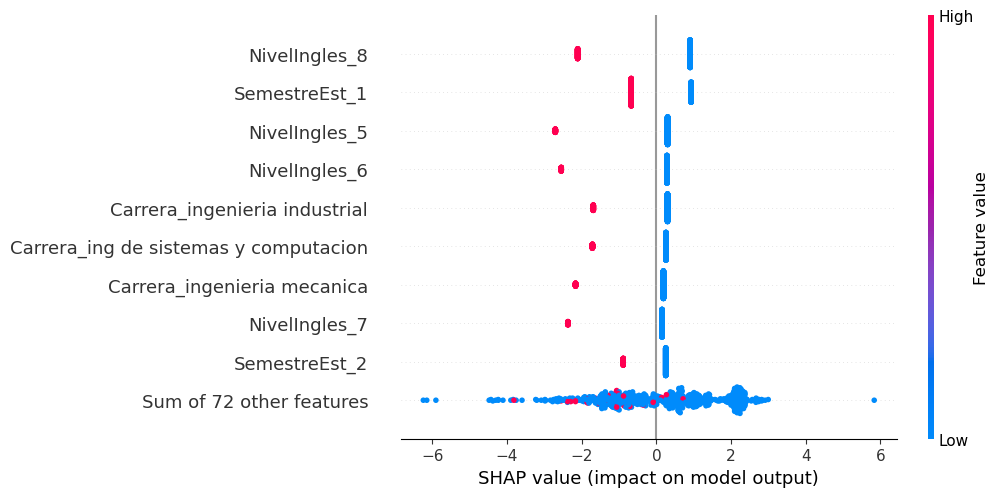

In [70]:
shap.plots.beeswarm(shap_values)

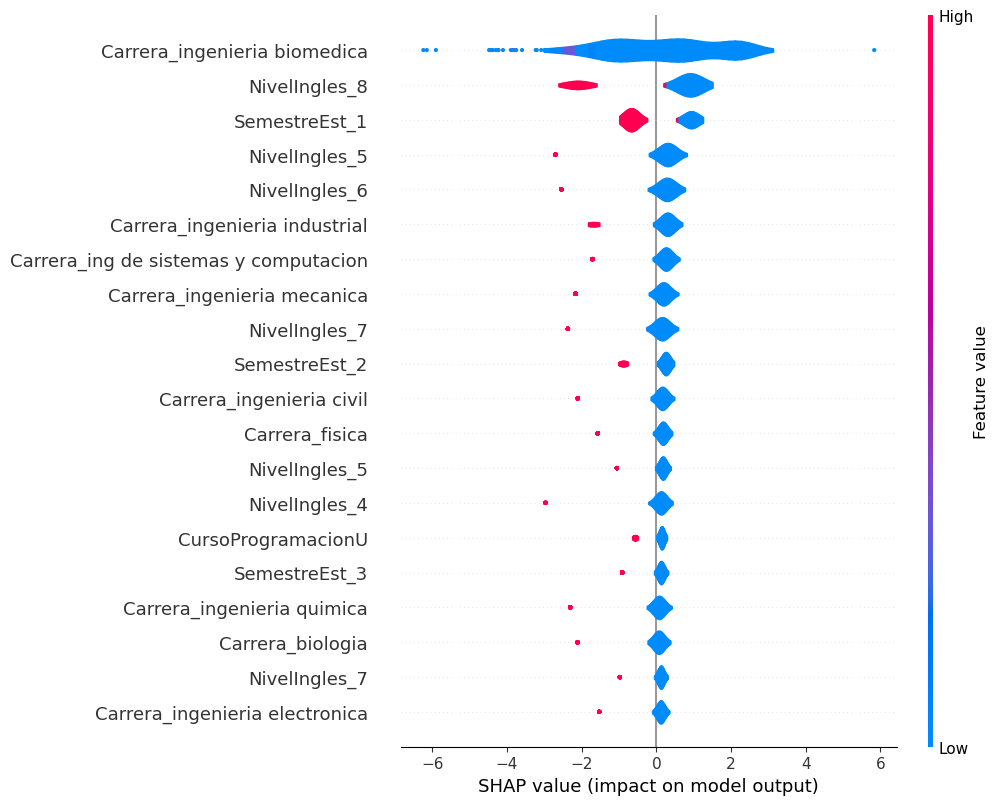

In [71]:
shap.summary_plot(shap_values, plot_type='violin')

## Prueba con OLS

In [72]:
for i in feature_names:
    if " " in i:
        df_final_f_f.rename(columns={i:i.replace(" ","_")},
               inplace=True)

In [73]:
string = ""
for i in df_final_f_f.drop(['PasoONo','n1_global','n2_global','n3_global','n4_global','SemestreAct'],1).columns:
    string=string+ i +"+"
string= string[:-1]
string

'ProgramoAntes+CursoProgramacionU+VioAPO1+VioAPO2+VioHerr_Comp+VioTallerPython+VioTallerR+VioIP+VioSAD+VioOtro+ProgramoEnColegio+TrabajoConJava+TrabajoConCMM+TrabajoConC+TrabajoConVB+TrabajoConJavascript+TrabajoConPython+TrabajoConArduino+TrabajoConPHP+TrabajoConHTML+TrabajoConOtro+Carrera_administracion_de_empresas+Carrera_antropologia+Carrera_arquitectura+Carrera_arte+Carrera_biologia+Carrera_contaduria_internacional+Carrera_derecho+Carrera_diseño+Carrera_economia+Carrera_estudios_dirigidos+Carrera_estudios_generde_intercambio+Carrera_filosofia+Carrera_fisica+Carrera_geociencias+Carrera_gobierno_y_asuntos_publicos+Carrera_historia+Carrera_ing_de_sistemas_y_computacion+Carrera_ingenieria_ambiental+Carrera_ingenieria_biomedica+Carrera_ingenieria_civil+Carrera_ingenieria_de_alimentos+Carrera_ingenieria_electrica+Carrera_ingenieria_electronica+Carrera_ingenieria_industrial+Carrera_ingenieria_mecanica+Carrera_ingenieria_quimica+Carrera_lenguas_y_cultura+Carrera_literatura+Carrera_matemati

In [74]:
lm = smf.ols(formula = 'PasoONo ~ '+string, data=df_final_f_f).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PasoONo   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     5.781
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           3.74e-47
Time:                        04:19:05   Log-Likelihood:                -1248.9
No. Observations:                2033   AIC:                             2656.
Df Residuals:                    1954   BIC:                             3099.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.4663      0.058      8.032      0.000       0.352       0.580
ProgramoAntes                             0.0109      0.030      0.369      0.712      -0.047       0.069
CursoProgramacionU                       -0.1254      0.056     -2.231      0.026      -0.236      -0.015
VioAPO1                                  -0.0072      0.070     -0.103      0.918      -0.145       0.130
VioAPO2                                   0.2982      0.215      1.389      0.165      -0.123       0.719
VioHerr_Comp                              0.0069      0.231      0.030      0.976      -0.445       0.459
VioTallerPython                          -0.1387      0.098     -1.414      0.157      -0.331       0.054
VioTallerR                                0.1575      0.216      0.729      0.466      -0.266       0.582
VioIP                                    -0.0420      0.056     -0.744      0.457      -0.153       0.069
VioSAD                                   -0.3287      0.351     -0.938      0.348      -1.016       0.359
VioOtro                                   0.0944      0.036      2.625      0.009       0.024       0.165
ProgramoEnColegio                         0.0256      0.026      0.978      0.328      -0.026       0.077
TrabajoConJava                           -0.0286      0.032     -0.900      0.368      -0.091       0.034
TrabajoConCMM                             0.0303      0.032      0.959      0.338      -0.032       0.092
TrabajoConC                              -0.0019      0.070     -0.028      0.978      -0.139       0.135
TrabajoConVB                              0.0455      0.043      1.069      0.285      -0.038       0.129
TrabajoConJavascript                     -0.0593      0.036     -1.658      0.097      -0.129       0.011
TrabajoConPython                          0.0129      0.030      0.430      0.667      -0.046       0.072
TrabajoConArduino                         0.0045      0.027      0.166      0.868      -0.049       0.058
TrabajoConPHP                             0.1250      0.068      1.831      0.067      -0.009       0.259
TrabajoConHTML                            0.0010      0.026      0.037      0.970      -0.050       0.052
TrabajoConOtro                           -0.0260      0.034     -0.771      0.441      -0.092       0.040
Carrera_administracion_de_empresas       -0.0512      0.119     -0.431      0.666      -0.284       0.182
Carrera_antropologia                      0.6695      0.451      1.483      0.138      -0.216       1.555
Carrera_arquitectura                      0.2671      0.230      1.163      0.245      -0.183       0.717
Carrera_arte                             -0.0502      0.215     -0.233      0.816      -0.473       0.372
Carrera_b

## Random Forest

### Preparación datos para Random Forest

In [75]:
carreras = pd.get_dummies(df_final.Carrera, prefix='Carrera')

In [76]:
df_final_f_2 = df_final.drop(columns=['Carrera','definitiva_profesor'])

In [77]:
df_final_f_f_2 = pd.concat([df_final_f_2,carreras], axis=1)

In [78]:
x_drop=df_final_f_f_2.drop(['PasoONo','SemestreAct','n1_global','n2_global','n3_global','n4_global'],1)
# x_drop=df_final_f_f.drop(['PasoONo','SemestreAct'],1)
feature_names= x_drop.columns
X = np.array(x_drop)
y = np.array(df_final_f_f_2['PasoONo'])


### SMOTE 

In [79]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [80]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

### Búsqueda Hiperparámetros

In [81]:
estratos = StratifiedKFold(n_splits=10,random_state=1001,shuffle=True)
arbol = RandomForestClassifier(random_state=1001)
param_grid = {
'n_estimators' : [10, 100, 1000],
'max_features' : ['sqrt', 'log2'],
'max_depth' : [10,50,100],
'min_samples_split': [5,10,20,40]
}

mejor_modelo = GridSearchCV(arbol, param_grid, cv=estratos, scoring='accuracy',error_score=0)
mejor_modelo.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1001, shuffle=True),
             error_score=0, estimator=RandomForestClassifier(random_state=1001),
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [5, 10, 20, 40],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy')

In [82]:
mejor_modelo.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 20,
 'n_estimators': 100}

In [83]:
 # Obtener el mejor modelo.
model = mejor_modelo.best_estimator_
# model = RandomForestClassifier(random_state=1001)
# model.fit(X_train, y_train)

In [84]:
y_pred=model.predict(X_test)
y_train_pred= model.predict(X_train)

In [85]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6763848396501457


In [86]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       820
           1       0.67      0.78      0.72       778

    accuracy                           0.71      1598
   macro avg       0.71      0.71      0.71      1598
weighted avg       0.71      0.71      0.71      1598



In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.63      0.65       322
           1       0.69      0.72      0.70       364

    accuracy                           0.68       686
   macro avg       0.68      0.67      0.67       686
weighted avg       0.68      0.68      0.68       686



In [88]:
# Quitar dimensiones, quitar variables dummies.

In [89]:
feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

NivelIngles                              0.175854
VioIP                                    0.062221
CursoProgramacionU                       0.052770
SemestreEst                              0.050583
TrabajoConPython                         0.048104
TrabajoConJavascript                     0.037731
ProgramoAntes                            0.034142
TrabajoConArduino                        0.032032
TrabajoConHTML                           0.028676
TrabajoConOtro                           0.027129
VioOtro                                  0.026768
ProgramoEnColegio                        0.025127
Carrera_ingenieria industrial            0.023718
TrabajoConCMM                            0.023043
Carrera_quimica                          0.021594
TrabajoConJava                           0.020639
Carrera_ingenieria mecanica              0.020366
Carrera_fisica                           0.019348
TrabajoConVB                             0.018983
Carrera_ing de sistemas y computacion    0.017088


# Predicción con los estudiantes que se tienen información del icfes y materias como calculo o escritura universitaria

## Carga y Limpieza de datos

In [90]:
info_estudiantes_v2= info_estudiantes[info_estudiantes['saber_v2'].isnull() == False].copy()

In [91]:
df_prueba_est_icf = info_estudiantes_v2[['puntos','sexo','saber_v2','semestre_segun_creditos','generacion_e','veces_visto','n1_global','n2_global','n3_global','n4_global','definitiva_profesor','saber_matematicas'
                                     ,'saber_v2_cienciasnaturales','saber_v2_ingles','saber_v2_lecturacritica','saber_v2_socialesciudad','retiroOno']].copy()

In [92]:
df_prueba_est_icf= df_prueba_est_icf[df_prueba_est_icf['sexo'].isnull() == False].copy()

In [93]:
df_prueba_est_icf['sexo'] = np.where((df_prueba_est_icf['sexo']=='M'),1,0)
df_prueba_est_icf['PasoONo'] = np.where((df_prueba_est_icf['definitiva_profesor']>=3.0),1,0)


In [94]:
# Se supone que si la nota final es 0 , retiró
# df_prueba_est_icf = df_prueba_est_icf[df_prueba_est_icf['definitiva_profesor']>0].copy()

In [95]:
df_prueba_est_icf['sexo'].value_counts()

1    953
0    416
Name: sexo, dtype: int64

In [96]:
df_prueba_est_icf.isnull().sum()

puntos                        0
sexo                          0
saber_v2                      0
semestre_segun_creditos       0
generacion_e                  0
veces_visto                   0
n1_global                     0
n2_global                     0
n3_global                     0
n4_global                     0
definitiva_profesor           0
saber_matematicas             0
saber_v2_cienciasnaturales    0
saber_v2_ingles               0
saber_v2_lecturacritica       0
saber_v2_socialesciudad       0
retiroOno                     0
PasoONo                       0
dtype: int64

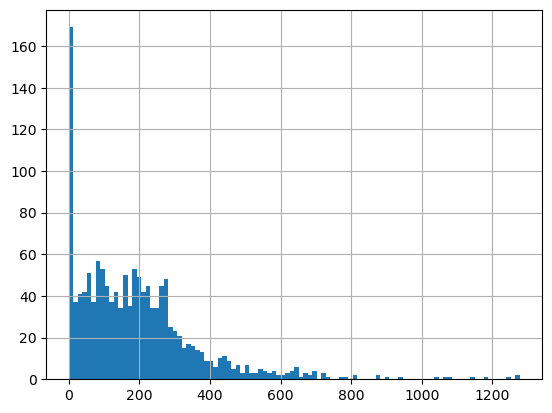

In [97]:
hist = df_prueba_est_icf['puntos'].hist(bins=100)

<AxesSubplot:>

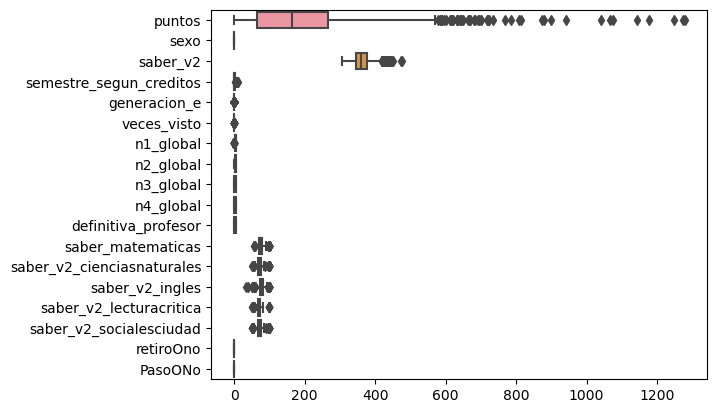

In [98]:
sns.boxplot(data=df_prueba_est_icf, orient="h")

## Selección Subdatasets

In [99]:
x_drop=df_prueba_est_icf.drop(['saber_v2','PasoONo','n1_global','n2_global','n3_global','n4_global','definitiva_profesor','retiroOno'],1)
feature_names= x_drop.columns
X = np.array(x_drop)
y = np.array(df_prueba_est_icf['PasoONo'])

## SMOTE

In [100]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

## Estandarización

In [101]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [102]:
t_columns= feature_names.union(pd.Index(['PasoONo']),sort=False)

In [103]:
ss = StandardScaler()
X_tr_df= pd.DataFrame(X_train,columns=feature_names)
y_tr_df= pd.DataFrame(y_train,columns=['PasoONo'])
train_comp= pd.concat([X_tr_df,y_tr_df],1)

X_te_df= pd.DataFrame(X_test,columns=feature_names)
y_te_df= pd.DataFrame(y_test,columns=['PasoONo'])
test_comp= pd.concat([X_te_df,y_te_df],1)

# Estandarizacion X_train
X_train_estd = ss.fit_transform(train_comp)
X_train_estd = pd.DataFrame(X_train_estd,columns=train_comp.columns)

# Estandarizacion X_test
X_test_estd = ss.transform(test_comp)
X_test_estd = pd.DataFrame(X_test_estd,columns=test_comp.columns)

#Separar de nuevo X's y y's
X_train= np.array(X_train_estd.drop(['PasoONo'],1))
X_test= np.array(X_test_estd.drop(['PasoONo'],1))
# y_train= np.array(X_train_estd['PasoONo'])
# y_test= np.array(X_test_estd['PasoONo'])


## Creación Regresión Logistica

### Búsqueda Hiperparámetros

In [104]:
estratos = StratifiedKFold(n_splits=10,random_state=1001,shuffle=True)
ols = linear_model.LogisticRegression(random_state=1001)
param_grid = {
'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'penalty' : ['l2'],
'C': [100, 10, 1.0, 0.1, 0.01]
}

mejor_modelo = GridSearchCV(ols, param_grid, cv=estratos)
mejor_modelo.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1001, shuffle=True),
             estimator=LogisticRegression(random_state=1001),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [105]:
mejor_modelo.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [106]:
 # Obtener el mejor modelo.
model = mejor_modelo.best_estimator_

In [107]:
model.score(X_test,y_test)

0.7073732718894009

In [108]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=1001,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.735187 (0.038514)


In [109]:
predictions_train = model.predict(X_train)
print(accuracy_score(y_train, predictions_train))

0.7401185770750988


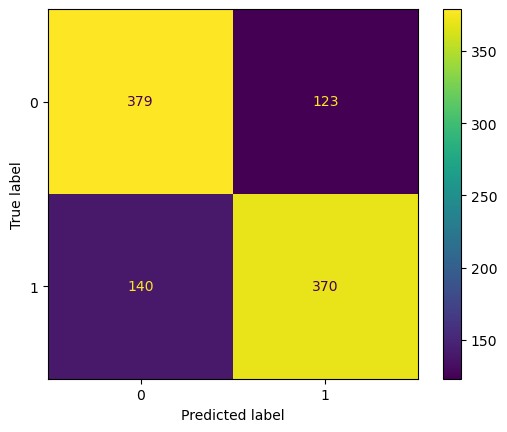

In [110]:
plot_confusion_matrix(model,X_train,y_train)

In [111]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       502
           1       0.75      0.73      0.74       510

    accuracy                           0.74      1012
   macro avg       0.74      0.74      0.74      1012
weighted avg       0.74      0.74      0.74      1012



In [112]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7073732718894009


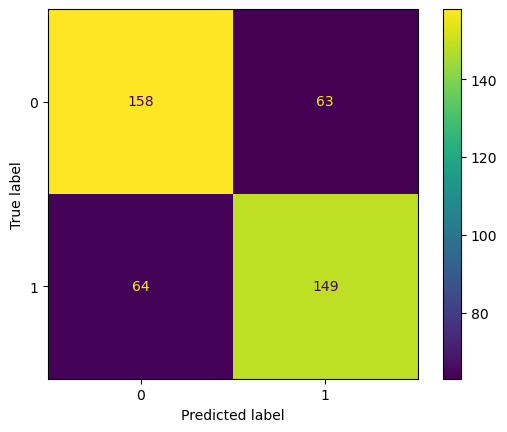

In [113]:
plot_confusion_matrix(model,X_test,y_test)

In [114]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       221
           1       0.70      0.70      0.70       213

    accuracy                           0.71       434
   macro avg       0.71      0.71      0.71       434
weighted avg       0.71      0.71      0.71       434



In [115]:
def valorAbsoluto(num):
    return abs(num)

In [116]:
importances = pd.DataFrame(data={
    'Attribute': feature_names,
    'Importance': model.coef_[0]
})
importances['Importance']=importances['Importance'].apply(valorAbsoluto)
importances = importances.sort_values(by='Importance', ascending=False)

In [117]:
importances

,Attribute,Importance
0,puntos,1.347579
2,semestre_segun_creditos,0.336949
1,sexo,0.333121
4,veces_visto,0.209784
7,saber_v2_ingles,0.164298
3,generacion_e,0.155382
5,saber_matematicas,0.111120
6,saber_v2_cienciasnaturales,0.092740
9,saber_v2_socialesciudad,0.084838
8,saber_v2_lecturacritica,0.029725


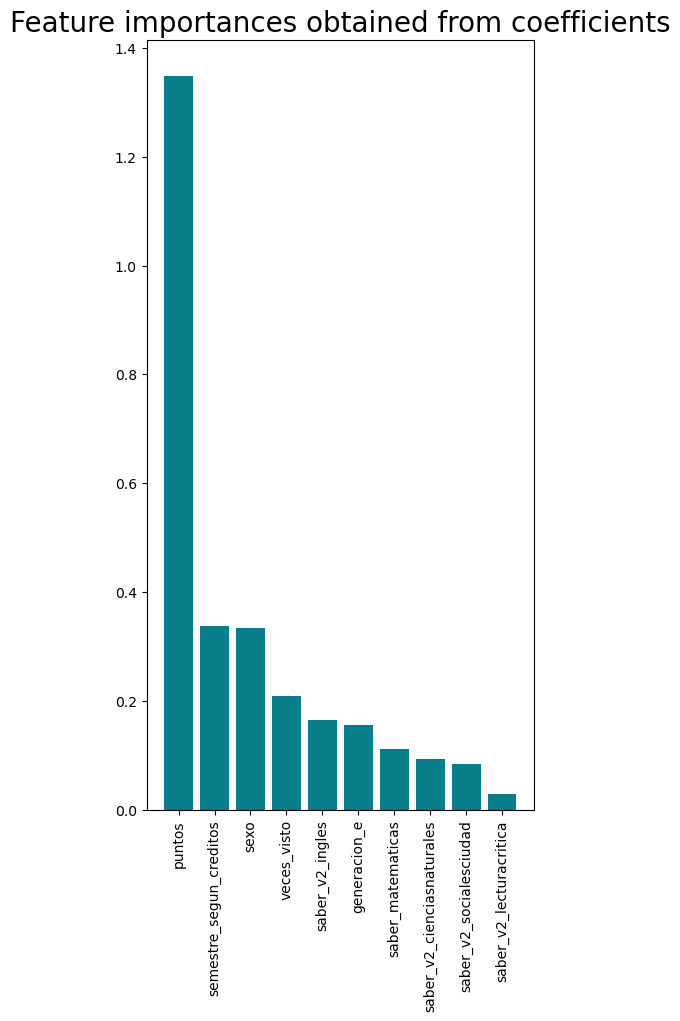

In [118]:
plt.figure(figsize=(5,10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [119]:
explainer = shap.Explainer(model, X_train, feature_names=feature_names)
shap_values = explainer(X_train)

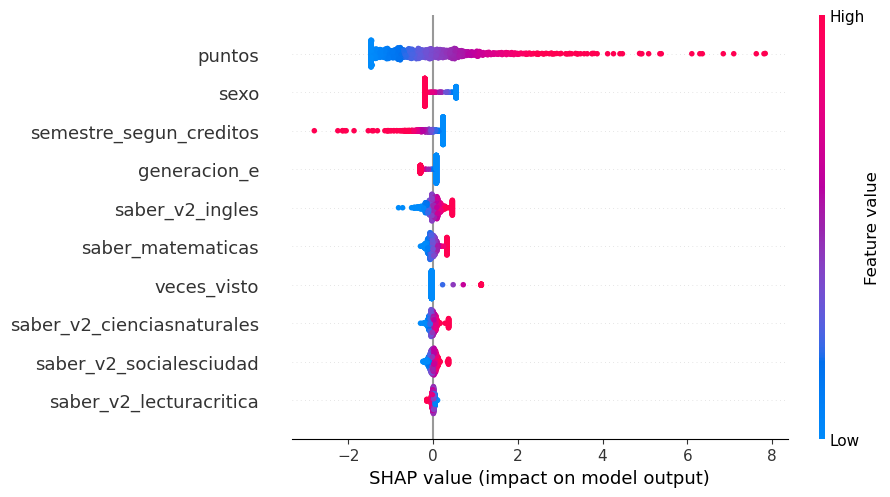

In [120]:
shap.plots.beeswarm(shap_values)

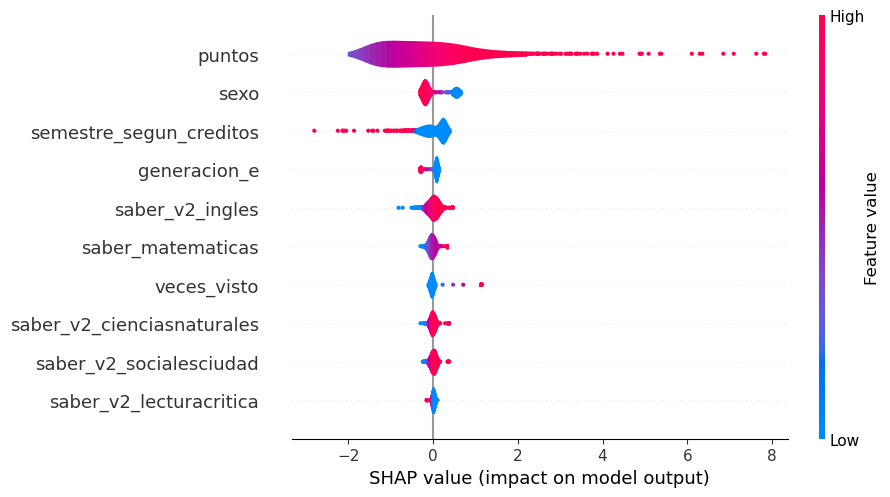

In [121]:
shap.summary_plot(shap_values, plot_type='violin')

## Prueba con OLS

In [122]:
for i in feature_names:
    if " " in i:
        df_prueba_est_icf.rename(columns={i:i.replace(" ","_")},
               inplace=True)

In [123]:
string = ""
for i in df_prueba_est_icf.drop(['saber_v2','PasoONo','n1_global','n2_global','n3_global','n4_global','definitiva_profesor','retiroOno'],1).columns:
    string=string+ i +"+"
string= string[:-1]
string

'puntos+sexo+semestre_segun_creditos+generacion_e+veces_visto+saber_matematicas+saber_v2_cienciasnaturales+saber_v2_ingles+saber_v2_lecturacritica+saber_v2_socialesciudad'

In [124]:
lm = smf.ols(formula = 'PasoONo ~ '+string, data=df_prueba_est_icf).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PasoONo   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     39.92
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           2.52e-69
Time:                        04:26:37   Log-Likelihood:                -815.06
No. Observations:                1369   AIC:                             1652.
Df Residuals:                    1358   BIC:                             1710.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.4095      0.184     -2.225      0.026      -0.771      -0.048
puntos                         0.0012   7.02e-05     16.499      0.000       0.001       0.001
sexo                          -0.1387      0.026     -5.258      0.000      -0.190      -0.087
semestre_segun_creditos       -0.0420      0.010     -4.104      0.000      -0.062      -0.022
generacion_e                  -0.0336      0.031     -1.077      0.282      -0.095       0.028
veces_visto                    0.2189      0.064      3.425      0.001       0.094       0.344
saber_matematicas              0.0037      0.002      2.009      0.045    8.57e-05       0.007
saber_v2_cienciasnaturales     0.0010      0.002      0.488      0.626      -0.003       0.005
saber_v2_ingles                0.0031      0.002      2.045      0.041       0.000       0.006
saber_v2_lecturacritica        0.0011      0.002      0.436      0.663      -0.004       0.006
saber_v2_socialesciudad        0.0019      0.002      0.885      0.376      -0.002       0.006
==============================================================================
Omnibus:                     2375.543   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.474
Skew:                           0.076   Prob(JB):                     3.06e-21
Kurtosis:                       1.722   Cond. No.                     4.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Random Forest

### Preparación datos para Random Forest

In [125]:
x_drop=df_prueba_est_icf.drop(['saber_v2','PasoONo','n1_global','n2_global','n3_global','n4_global','definitiva_profesor','retiroOno'],1)
# x_drop=df_final_f_f.drop(['PasoONo','SemestreAct'],1)
feature_names= x_drop.columns
X = np.array(x_drop)
y = np.array(df_prueba_est_icf['PasoONo'])


### SMOTE 

In [126]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [127]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

### Búsqueda Hiperparámetros

In [128]:
estratos = StratifiedKFold(n_splits=10,random_state=1001,shuffle=True)
arbol = RandomForestClassifier(random_state=1001)
param_grid = {
'n_estimators' : [10,20,50],
'max_features' : ['sqrt', 'log2'],
'max_depth' : [10,50,100],
'min_samples_split': [5,10,20],
'min_samples_leaf': [5,10,20]
}

mejor_modelo = GridSearchCV(arbol, param_grid, cv=estratos, scoring='accuracy',error_score=0)
mejor_modelo.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1001, shuffle=True),
             error_score=0, estimator=RandomForestClassifier(random_state=1001),
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [10, 20, 50]},
             scoring='accuracy')

In [129]:
mejor_modelo.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [130]:
 # Obtener el mejor modelo.
model = mejor_modelo.best_estimator_

In [131]:
y_pred=model.predict(X_test)
y_train_pred= model.predict(X_train)

In [132]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7580645161290323


In [133]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       522
           1       0.86      0.90      0.88       490

    accuracy                           0.88      1012
   macro avg       0.88      0.88      0.88      1012
weighted avg       0.88      0.88      0.88      1012



In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       201
           1       0.75      0.83      0.79       233

    accuracy                           0.76       434
   macro avg       0.76      0.75      0.75       434
weighted avg       0.76      0.76      0.76       434



In [135]:
# Quitar dimensiones, quitar variables dummies.

In [136]:
feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

puntos                        0.467411
saber_v2_ingles               0.089680
saber_v2_socialesciudad       0.086217
saber_v2_lecturacritica       0.081000
semestre_segun_creditos       0.078805
saber_matematicas             0.076320
saber_v2_cienciasnaturales    0.071717
sexo                          0.031565
generacion_e                  0.011148
veces_visto                   0.006137
dtype: float64

# Predicción tanto encuestas como datos de icfes juntos

## Unión de datos a utilizar 

In [137]:
df_icf_encuestas= df_prediccion_casi[df_prediccion_casi['saber_v2'].isnull() == False].copy()
df_icf_encuestas

,SemestreAct,Estudiante_x,Seccion,Carrera,SemestreEst,ProgramoAntes,NivelIngles,CursoProgramacionU,VioAPO1,VioAPO2,VioHerr_Comp,VioTallerPython,VioTallerR,VioIP,VioSAD,VioOtro,ProgramoEnColegio,TrabajoConJava,TrabajoConCMM,TrabajoConC,TrabajoConVB,TrabajoConJavascript,TrabajoConPython,TrabajoConArduino,TrabajoConPHP,TrabajoConHTML,TrabajoConOtro,IdentificadorUnico,id,semestre,curso,codigo,login,apellidos,nombres,fecha_nacimiento,sexo,colegio,colegio_codigo,saber_v1,saber_v2,mate1203,leng1501,lite1611,huma1300,programa,programa_codigo,programa_doble,creditos_inscritos,semestre_segun_creditos,spp,generacion_e,curso_nombre,veces_visto,seccion,profesor,profesor_correo,asistencias_ctm1,asistencias_ctm2,asistencias_ctm3,asistencias_ctm4,asistencias_ctm5,asistencias_ctm6,observaciones,n1_teorico,n2_teorico,n3_teorico,n4_teorico,n5_teorico,n6_teorico,n1_ejercicio,n2_ejercicio,n3_ejercicio,n4_ejercicio,n5_ejercicio,n6_ejercicio,n1_anulacion,n2_anulacion,n3_anulacion,n4_anulacion,n5_anulacion,n6_anulacion,n1_practico,n2_practico,n3_practico,n4_practico,n5_practico,n6_practico,actividades_1,actividades_2,n1_fallas,n2_fallas,n3_fallas,n4_fallas,n5_fallas,n6_fallas,n1_global,n2_global,n3_global,n4_global,n5_global,n6_global,retiro,definitiva_profesor,retiro_banner,retiro_banner_fecha,definitiva_banner,n1_t,n2_t,n3_t,n4_t,n5_t,n6_t,n1_e,n2_e,n3_e,n4_e,n5_e,n6_e,n1_l,n2_l,n3_l,n4_l,n5_l,n6_l,n1,n2,n3,n4,n5,n6,act_1,act_2,activo,porcentaje_inasistencias,pga,riesgo_deca,tipo_riesgo_deca,spadies,riesgo_disc,saber_biologia,saber_ciencias,saber_filosofia,saber_fisica,saber_lenguajes,saber_quimica,saber_matematicas,saber_v2_cienciasnaturales,saber_v2_ingles,saber_v2_lecturacritica,saber_v2_socialesciudad,anio_grado,precalculo,Estudiante_y
1989,202010,juan diego heredia niño,1,economia,5,Verdadero,5,Falso,0,0,0,0,0,0,0,0,Verdadero,0,0,0,0,0,0,1,0,0,0,202010juan diego heredia niño,55933,202010,ISIS 1221,201813809,jd.heredian,HEREDIA NIÑO,JUAN DIEGO,2001-03-26,M,COL DE LA SALLE,32730.0,NaN,377.0,NaN,NaN,NaN,NaN,ECONOMIA,ECON,ADMI,20.0,4.12,0,0,INTRODUCCIÓN A LA PROGRAMACIÓN,0,1.0,Andres Melani De La Hoz,af.melani3365@uniandes.edu.co,0,0,0,0,0,0,NaN,4.95,4.17,4.40,4.00,0,0,5.00,4.44,-1.00,4.15,0,0,0,0,0,0,0,0,4.97,3.75,4.40,4.00,0,0,0,0,0,0,0,0,0,0,4.97,4.17,3.66,4.16,0,0,NaN,4.32,NaN,NaN,4.5,0.05,0.14,0.13,0.07,0.07,0.14,0.01,0.02,0.02,0.02,0.02,0.05,0.04,0.04,0.05,0.03,0.04,0.06,0.1,0.2,0.2,0.12,0.13,0.25,0,0,1,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,72.0,73.0,73.0,79.0,20172.0,NaN,juan diego heredia niño
1990,202010,maria paula alarcon perico,1,ingenieria electronica,1,Verdadero,5,Falso,0,0,0,0,0,0,0,0,Verdadero,0,0,0,0,0,0,1,0,0,0,202010maria paula alarcon perico,55934,202010,ISIS 1221,201911264,mp.alarcon,ALARCON PERICO,MARIA PAULA,2001-04-04,F,COL SEM DIOCESANO,5108.0,NaN,327.0,NaN,NaN,NaN,NaN,INGENIERIA ELECTRONICA,IELC,NaN,18.0,0.00,0,0,INTRODUCCIÓN A LA PROGRAMACIÓN,0,1.0,Andres Melani De La Hoz,af.melani3365@uniandes.edu.co,0,0,0,0,0,0,NaN,1.90,1.05,0.85,1.65,0,0,4.28,2.89,-1.00,5.00,0,0,1,1,0,1,0,0,0.00,1.31,0.85,1.65,0,0,0,0,0,0,0,0,0,0,1.45,1.62,1.44,2.73,0,0,NaN,1.92,NaN,NaN,2.0,0.05,0.14,0.13,0.07,0.07,0.14,0.00,0.02,0.02,0.02,0.02,0.05,0.05,0.04,0.05,0.03,0.04,0.06,0.1,0.2,0.2,0.12,0.13,0.25,0,0,1,0.0,0,1.0,PRIM,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,70.0,66.0,63.0,56.0,20182.0,NaN,maria paula alarcon perico
1991,202010,jose miguel mejia cardona,1,ingenieria industrial,1,Falso,5,Falso,0,0,0,0,0,0,0,0,Falso,0,0,0,0,0,0,0,0,0,0,202010jose miguel mejia cardona,55935,202010,ISIS 1221,201913232,jm.mejiac,MEJIA CARDONA,JOSE MIGUEL,2001-01-24,M,COL ESPIRITU SANTO,57992.0,NaN,326.0,NaN,NaN,NaN,NaN,INGENIERIA INDUSTRIAL,IIND,NaN,17.0,0.00,0,0,INTRODUCCIÓN A LA PROGRAMACIÓN,0,1.0,Andres Melani De La Hoz,af.melani3365@uniandes.edu.co,0,1,4,3,0,0,NaN,1.25,0.90,3.90,4.75,0,0,4.69,4.65,-1.00,4.64,0,0,1,1,0,0,0,0,2.86,1.50,3.90,4.75,0,0,0,0,0,0,0,0,0,0,2.27,1.61,3.41,4.62,0,0,NaN,3.41,NaN,NaN,3.5,0.05,0.14,0.13,0.07,0.07,0.14,0.00,0.02,0.02,

## Limpieza de datos

In [138]:
df_final_f_f['PasoONo'].value_counts()

0    1142
1     891
Name: PasoONo, dtype: int64

In [139]:
# df_final_f_f['sexo'].value_counts()

In [140]:
df_final=df_icf_encuestas[['sexo','saber_v2','semestre_segun_creditos','generacion_e','veces_visto','saber_matematicas'
                          ,'saber_v2_cienciasnaturales','saber_v2_ingles','saber_v2_lecturacritica','saber_v2_socialesciudad','SemestreAct','Carrera','SemestreEst','ProgramoAntes','NivelIngles','CursoProgramacionU','VioAPO1','VioAPO2','VioHerr_Comp','VioTallerPython','VioTallerR','VioIP','VioSAD','VioOtro','ProgramoEnColegio',
                          'TrabajoConJava','TrabajoConCMM','TrabajoConC','TrabajoConVB','TrabajoConJavascript','TrabajoConPython','TrabajoConArduino','TrabajoConPHP','TrabajoConHTML','TrabajoConOtro','n1_global','n2_global','n3_global','n4_global','definitiva_profesor']].copy()

In [141]:
cols_revisar= ['VioAPO1','VioAPO2','VioHerr_Comp','VioTallerPython','VioTallerR','VioIP','VioSAD','VioOtro',
                      'TrabajoConJava','TrabajoConCMM','TrabajoConC','TrabajoConVB','TrabajoConJavascript','TrabajoConPython','TrabajoConArduino','TrabajoConPHP','TrabajoConHTML','TrabajoConOtro']
cols_vio= ['VioAPO1','VioAPO2','VioHerr_Comp','VioTallerPython','VioTallerR','VioIP','VioSAD','VioOtro']
df_final = df_final[df_final['SemestreEst']!=-1].copy()
df_final = df_final[df_final['NivelIngles']!="No responde"].copy()
for i in cols_revisar:
    df_final[i] = np.where(df_final[i]>=1,1,np.where(df_final[i]==0,0,-1))
for i in cols_vio:
    df_final = df_final[df_final[i]!=-1].copy()
    

In [142]:
df_final['ProgramoAntes'] = np.where(df_final['ProgramoAntes']=="Verdadero",1,0)
df_final['CursoProgramacionU'] = np.where(df_final['CursoProgramacionU']=="Verdadero",1,0)
df_final['ProgramoEnColegio'] = np.where(df_final['ProgramoEnColegio']=="Verdadero",1,0)
df_final['PasoONo'] = np.where(df_final['definitiva_profesor']>=3.0,1,0)
df_final['sexo'] = np.where((df_final['sexo']=='M'),1,0)

In [143]:
# df_final.groupby(by="ProgramoEnColegio").count()

In [144]:
carreras = pd.get_dummies(df_final.Carrera, prefix='Carrera')
nivel_Ingles = pd.get_dummies(df_final.NivelIngles, prefix='NivelIngles')
semestre_est = pd.get_dummies(df_final.SemestreEst, prefix='SemestreEst')

In [145]:
df_final_f=df_final.drop(columns=['Carrera', 'NivelIngles','SemestreEst','definitiva_profesor'])

In [146]:
df_final_f_f = pd.concat([df_final_f,carreras, nivel_Ingles,semestre_est], axis=1)

In [147]:
df_final_f_f=df_final_f_f.dropna()

In [148]:
df_final_f_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 1989 to 2600
Data columns (total 75 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sexo                                   585 non-null    int32  
 1   saber_v2                               585 non-null    float64
 2   semestre_segun_creditos                585 non-null    float64
 3   generacion_e                           585 non-null    int64  
 4   veces_visto                            585 non-null    int64  
 5   saber_matematicas                      585 non-null    float64
 6   saber_v2_cienciasnaturales             585 non-null    float64
 7   saber_v2_ingles                        585 non-null    float64
 8   saber_v2_lecturacritica                585 non-null    float64
 9   saber_v2_socialesciudad                585 non-null    float64
 10  SemestreAct                            585 non-null    object 
 11  Pr

## Selección de subdatasets

In [149]:
# hist = df_final_f_f['definitiva_profesor'].hist(bins=10)

In [150]:
#Standar Scaler - Probar , Estandarizar train luego de dividir entre train (fit_transform) y test(transform), probar con SVM - SVC 

In [151]:
x_drop=df_final_f_f.drop(['PasoONo','n1_global','n2_global','n3_global','n4_global','SemestreAct','saber_v2'],1)
feature_names= x_drop.columns
X = np.array(x_drop)
y = np.array(df_final_f_f['PasoONo'])

## SMOTE

In [152]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

## Estandarización

In [153]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [154]:
t_columns= feature_names.union(pd.Index(['PasoONo']),sort=False)

In [155]:
ss = StandardScaler()
X_tr_df= pd.DataFrame(X_train,columns=feature_names)
y_tr_df= pd.DataFrame(y_train,columns=['PasoONo'])
train_comp= pd.concat([X_tr_df,y_tr_df],1)

X_te_df= pd.DataFrame(X_test,columns=feature_names)
y_te_df= pd.DataFrame(y_test,columns=['PasoONo'])
test_comp= pd.concat([X_te_df,y_te_df],1)

# Estandarizacion X_train
X_train_estd = ss.fit_transform(train_comp)
X_train_estd = pd.DataFrame(X_train_estd,columns=train_comp.columns)

# Estandarizacion X_test
X_test_estd = ss.transform(test_comp)
X_test_estd = pd.DataFrame(X_test_estd,columns=test_comp.columns)

#Separar de nuevo X's y y's
X_train= np.array(X_train_estd.drop(['PasoONo'],1))
X_test= np.array(X_test_estd.drop(['PasoONo'],1))
# y_train= np.array(X_train_estd['PasoONo'])
# y_test= np.array(X_test_estd['PasoONo'])

In [156]:
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)
# X_test, y_test = oversample.fit_resample(X_test, y_test)

## Creación Regresión Logistica

### Búsqueda Hiperparámetros

In [157]:
estratos = StratifiedKFold(n_splits=10,random_state=1001,shuffle=True)
ols = linear_model.LogisticRegression(random_state=1001)
param_grid = {
'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'penalty' : ['l2'],
'C': [100, 10, 1.0, 0.1, 0.01]
}

mejor_modelo = GridSearchCV(ols, param_grid, cv=estratos)
mejor_modelo.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1001, shuffle=True),
             estimator=LogisticRegression(random_state=1001),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [158]:
mejor_modelo.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [159]:
 # Obtener el mejor modelo.
model = mejor_modelo.best_estimator_

In [160]:
model.score(X_test,y_test)

0.6717557251908397

In [161]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=1001,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.659016 (0.047963)


In [162]:
predictions_train = model.predict(X_train)
print(accuracy_score(y_train, predictions_train))

0.7147540983606557


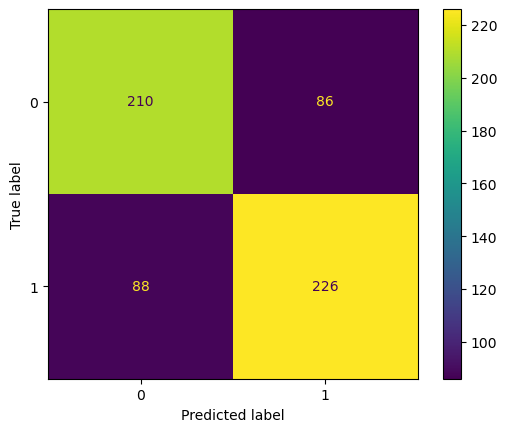

In [163]:
plot_confusion_matrix(model,X_train,y_train)

In [164]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       296
           1       0.72      0.72      0.72       314

    accuracy                           0.71       610
   macro avg       0.71      0.71      0.71       610
weighted avg       0.71      0.71      0.71       610



In [165]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.6717557251908397


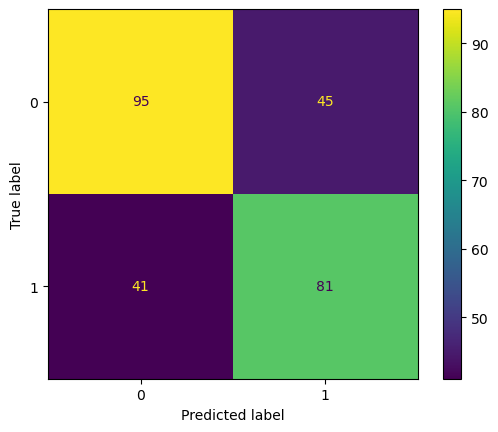

In [166]:
plot_confusion_matrix(model,X_test,y_test)

In [167]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       140
           1       0.64      0.66      0.65       122

    accuracy                           0.67       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.67      0.67      0.67       262



In [168]:
def valorAbsoluto(num):
    return abs(num)

In [169]:
importances = pd.DataFrame(data={
    'Attribute': feature_names,
    'Importance': model.coef_[0]
})
importances['Importance']=importances['Importance'].apply(valorAbsoluto)
importances = importances.sort_values(by='Importance', ascending=False)

In [170]:
importances

,Attribute,Importance
0,sexo,0.254095
8,saber_v2_socialesciudad,0.195757
25,TrabajoConPython,0.149337
29,TrabajoConOtro,0.114790
7,saber_v2_lecturacritica,0.108435
4,saber_matematicas,0.101073
48,Carrera_ingenieria mecanica,0.098639
28,TrabajoConHTML,0.091961
37,Carrera_estudios dirigidos,0.087651
34,Carrera_derecho,0.087252


In [171]:
feature_imp = pd.Series(model.coef_[0],index=feature_names).sort_values(ascending=False)
feature_imp

saber_v2_socialesciudad                  0.195757
TrabajoConPython                         0.149337
TrabajoConOtro                           0.114790
saber_v2_lecturacritica                  0.108435
saber_matematicas                        0.101073
Carrera_ingenieria mecanica              0.098639
TrabajoConHTML                           0.091961
Carrera_estudios dirigidos               0.087651
NivelIngles_6                            0.082830
ProgramoEnColegio                        0.081975
saber_v2_cienciasnaturales               0.077283
saber_v2_ingles                          0.072519
Carrera_biologia                         0.071432
TrabajoConJavascript                     0.069910
SemestreEst_7                            0.062199
Carrera_ingenieria electrica             0.060845
Carrera_ingenieria ambiental             0.053991
Carrera_ingenieria electronica           0.051165
SemestreEst_1                            0.050282
Carrera_quimica                          0.050272


In [172]:
# plt.figure(figsize=(20,30))
# plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
# plt.title('Feature importances obtained from coefficients', size=20)
# plt.xticks(rotation='vertical')
# plt.show()

In [173]:
explainer = shap.Explainer(model, X_train, feature_names=feature_names)
shap_values = explainer(X_test)

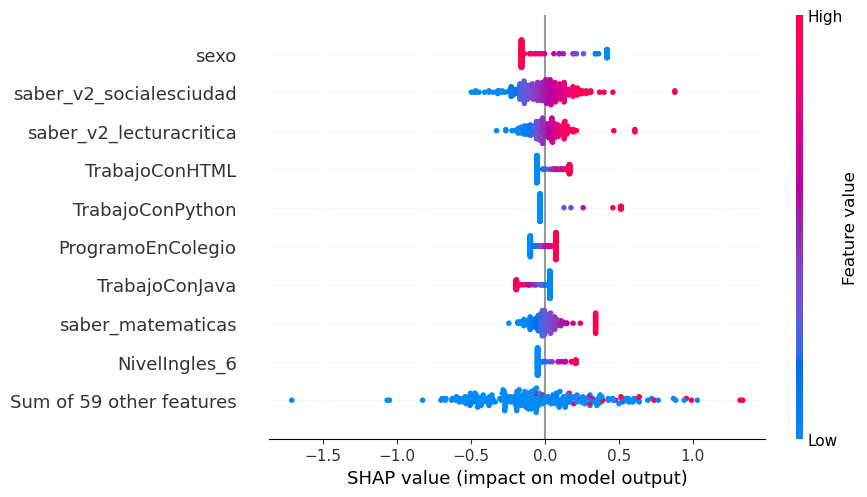

In [174]:
shap.plots.beeswarm(shap_values)

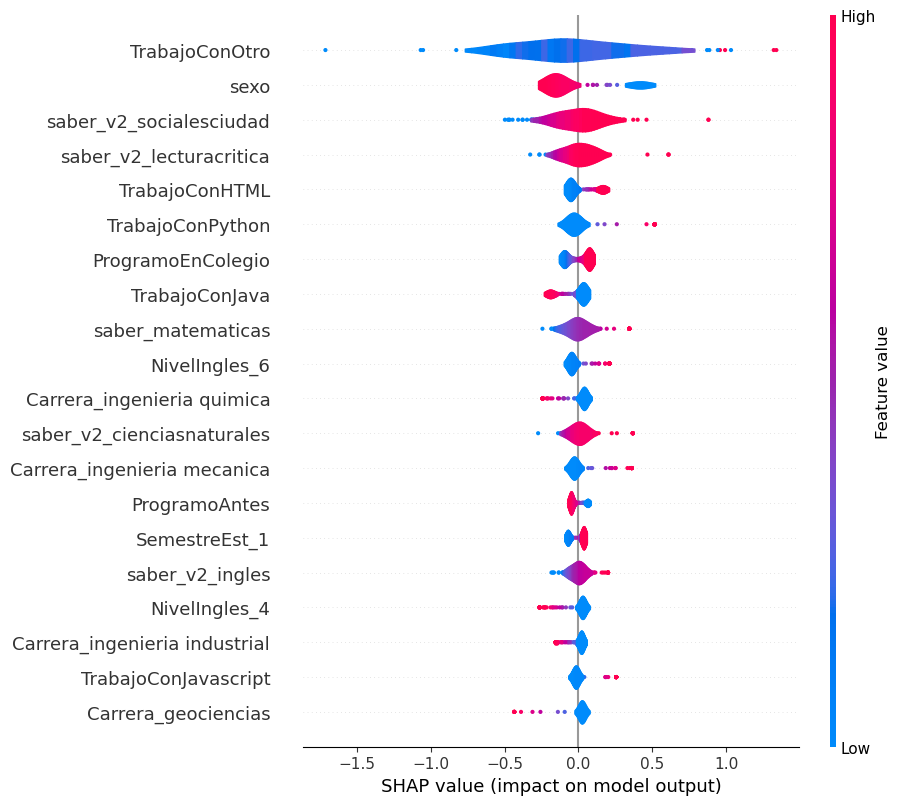

In [175]:
shap.summary_plot(shap_values, plot_type='violin')

## Prueba con OLS

In [176]:
for i in feature_names:
    if " " in i:
        df_final_f_f.rename(columns={i:i.replace(" ","_")},
               inplace=True)

In [177]:
string = ""
for i in df_final_f_f.drop(['PasoONo','n1_global','n2_global','n3_global','n4_global','SemestreAct','saber_v2'],1).columns:
    string=string+ i +"+"
string= string[:-1]
string

'sexo+semestre_segun_creditos+generacion_e+veces_visto+saber_matematicas+saber_v2_cienciasnaturales+saber_v2_ingles+saber_v2_lecturacritica+saber_v2_socialesciudad+ProgramoAntes+CursoProgramacionU+VioAPO1+VioAPO2+VioHerr_Comp+VioTallerPython+VioTallerR+VioIP+VioSAD+VioOtro+ProgramoEnColegio+TrabajoConJava+TrabajoConCMM+TrabajoConC+TrabajoConVB+TrabajoConJavascript+TrabajoConPython+TrabajoConArduino+TrabajoConPHP+TrabajoConHTML+TrabajoConOtro+Carrera_administracion_de_empresas+Carrera_arquitectura+Carrera_arte+Carrera_biologia+Carrera_derecho+Carrera_diseño+Carrera_economia+Carrera_estudios_dirigidos+Carrera_fisica+Carrera_geociencias+Carrera_gobierno_y_asuntos_publicos+Carrera_ing_de_sistemas_y_computacion+Carrera_ingenieria_ambiental+Carrera_ingenieria_biomedica+Carrera_ingenieria_civil+Carrera_ingenieria_electrica+Carrera_ingenieria_electronica+Carrera_ingenieria_industrial+Carrera_ingenieria_mecanica+Carrera_ingenieria_quimica+Carrera_matematicas+Carrera_quimica+NivelIngles_1+NivelI

In [178]:
lm = smf.ols(formula = 'PasoONo ~ '+string, data=df_final_f_f).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PasoONo   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.584
Date:                Wed, 30 Nov 2022   Prob (F-statistic):            0.00488
Time:                        04:27:52   Log-Likelihood:                -295.29
No. Observations:                 585   AIC:                             712.6
Df Residuals:                     524   BIC:                             979.2
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -0.5709      0.309     -1.845      0.066      -1.179       0.037
sexo                                     -0.1297      0.042     -3.068      0.002      -0.213      -0.047
semestre_segun_creditos                   0.1373      0.072      1.900      0.058      -0.005       0.279
generacion_e                             -0.0329      0.046     -0.709      0.478      -0.124       0.058
veces_visto                               0.2933      0.447      0.657      0.511      -0.584       1.171
saber_matematicas                         0.0033      0.003      1.160      0.247      -0.002       0.009
saber_v2_cienciasnaturales                0.0018      0.003      0.523      0.601      -0.005       0.008
saber_v2_ingles                           0.0014      0.003      0.482      0.630      -0.004       0.007
saber_v2_lecturacritica                   0.0030      0.004      0.796      0.426      -0.004       0.010
saber_v2_socialesciudad                   0.0074      0.003      2.300      0.022       0.001       0.014
ProgramoAntes                            -0.1237      0.060     -2.061      0.040      -0.242      -0.006
CursoProgramacionU                        0.2877      0.639      0.450      0.653      -0.967       1.542
VioAPO1                                  -0.2216      0.626     -0.354      0.723      -1.450       1.007
VioAPO2                                1.968e-15   1.63e-15      1.209      0.227   -1.23e-15    5.17e-15
VioHerr_Comp                          -5.039e-16   6.61e-16     -0.763      0.446    -1.8e-15    7.94e-16
VioTallerPython                       -2.118e-15   2.36e-15     -0.898      0.369   -6.75e-15    2.51e-15
VioTallerR                             2.127e-16   3.82e-16      0.557      0.578   -5.37e-16    9.62e-16
VioIP                                    -0.5607      0.775     -0.723      0.470      -2.083       0.962
VioSAD                                  8.48e-16   8.88e-16      0.955      0.340   -8.96e-16    2.59e-15
VioOtro                                  -0.2613      0.653     -0.400      0.689      -1.544       1.022
ProgramoEnColegio                         0.0490      0.047      1.038      0.300      -0.044       0.142
TrabajoConJava                           -0.0479      0.056     -0.863      0.389      -0.157       0.061
TrabajoConCMM                             0.0934      0.057      1.641      0.101      -0.018       0.205
TrabajoConC                               0.0016      0.139      0.012      0.991      -0.272       0.276
TrabajoConVB                              0.0121      0.063      0.192      0.848      -0.112       0.136
TrabajoConJavascript                      0.0445      0.067      0.660      0.510      -0.088       0.177
TrabajoCo

## Random Forest

### Preparación datos para Random Forest

In [179]:
carreras = pd.get_dummies(df_final.Carrera, prefix='Carrera')

In [180]:
df_final_f_2 = df_final.drop(columns=['Carrera','definitiva_profesor'])

In [181]:
df_final_f_f_2 = pd.concat([df_final_f_2,carreras], axis=1)

In [182]:
df_final_f_f_2=df_final_f_f_2.dropna()

In [183]:
x_drop=df_final_f_f_2.drop(['saber_v2','PasoONo','SemestreAct','n1_global','n2_global','n3_global','n4_global'],1)
# x_drop=df_final_f_f.drop(['PasoONo','SemestreAct'],1)
feature_names= x_drop.columns
X = np.array(x_drop)
y = np.array(df_final_f_f_2['PasoONo'])


### SMOTE 

In [184]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [185]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

### Búsqueda Hiperparámetros

In [186]:
estratos = StratifiedKFold(n_splits=10,random_state=1001,shuffle=True)
arbol = RandomForestClassifier(random_state=1001)
param_grid = {
'n_estimators' : [10,20,50],
'max_features' : ['sqrt', 'log2'],
'max_depth' : [10,50,100],
'min_samples_split': [5,10,20],
'min_samples_leaf': [5,10,20]
}

mejor_modelo = GridSearchCV(arbol, param_grid, cv=estratos, scoring='accuracy',error_score=0)
mejor_modelo.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1001, shuffle=True),
             error_score=0, estimator=RandomForestClassifier(random_state=1001),
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [10, 20, 50]},
             scoring='accuracy')

In [187]:
mejor_modelo.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 20}

In [188]:
 # Obtener el mejor modelo.
model = mejor_modelo.best_estimator_

In [189]:
y_pred=model.predict(X_test)
y_train_pred= model.predict(X_train)

In [190]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8473282442748091


In [191]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.88       312
           1       0.85      0.93      0.89       298

    accuracy                           0.89       610
   macro avg       0.89      0.89      0.89       610
weighted avg       0.89      0.89      0.89       610



In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       124
           1       0.84      0.88      0.86       138

    accuracy                           0.85       262
   macro avg       0.85      0.85      0.85       262
weighted avg       0.85      0.85      0.85       262



In [193]:
# Quitar dimensiones, quitar variables dummies.

In [194]:
feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

saber_v2_socialesciudad                  0.090115
sexo                                     0.076614
saber_v2_ingles                          0.070040
ProgramoAntes                            0.065979
saber_matematicas                        0.065447
saber_v2_lecturacritica                  0.058369
saber_v2_cienciasnaturales               0.056962
TrabajoConPython                         0.047159
Carrera_ingenieria industrial            0.039633
ProgramoEnColegio                        0.035880
TrabajoConJava                           0.034247
VioAPO1                                  0.033403
semestre_segun_creditos                  0.032582
TrabajoConArduino                        0.029806
TrabajoConCMM                            0.026310
CursoProgramacionU                       0.025190
generacion_e                             0.025145
TrabajoConHTML                           0.024148
SemestreEst                              0.023593
Carrera_ing de sistemas y computacion    0.018038


# Predicción con examenes de entrada ,encuestas de entrada y datos de notas

## Limpieza de datos

In [195]:
examenes= pd.read_excel('./datos/todo_examenes.xlsx')
examenes

,SemestreAct,Seccion,usuario_uniandes,ScoreExamen,ScoreTotalExamen,Primeros_Nombres,Apellidos
0,202020,1,nf.alonso,9,12,Nicolas Felipe,Alonso Zea
1,202020,1,j.colmenares,7,12,Juan Camilo,Colmenares Ortiz
2,202020,1,n.correalm,11,12,Nicolas,Correal Murillo
3,202020,1,n.cundy,5,12,Nicole,Cundy Pombo
4,202020,1,s.demendoza,6,12,Sebastian Alberto,De Mendoza Corrales
...,...,...,...,...,...,...,...
2965,202220,Sección 99,f.buriticam,4,12,Felipe,Buritica Martinez
2966,202220,Sección 99,js.diaza1,9,12,Juan Sebastian,Diaz Arango
2967,202220,Sección 99,k.moralesb,0,12,Karoline Michel,Morales Barrero
2968,202220,Sección 99,ky.moreno,5,12,Karen Yulieth,Moreno Moreno


In [196]:
examenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SemestreAct       2970 non-null   int64 
 1   Seccion           2970 non-null   object
 2   usuario_uniandes  2970 non-null   object
 3   ScoreExamen       2970 non-null   int64 
 4   ScoreTotalExamen  2970 non-null   int64 
 5   Primeros_Nombres  2970 non-null   object
 6   Apellidos         2970 non-null   object
dtypes: int64(3), object(4)
memory usage: 162.5+ KB


In [197]:
def limpiar_Seccion(texto):
    if "Sección 0" in texto:
        ret= texto.replace("Sección 0","")
    elif "Sección " in texto:
        ret= texto.replace("Sección ","")
    else:
        ret=texto
    return ret

In [198]:
examenes['Seccion'] = examenes['Seccion'].apply(limpiar_Seccion)

In [199]:
examenes['Seccion'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '36', '98', '99'], dtype=object)

In [200]:
examenes['ScoreTotalExamen'].unique()

array([12], dtype=int64)

In [201]:
def ponerEnLowerCase(p):
    if isinstance(p, float):
        return ""
    else:
        return p.lower()

In [202]:
examenes['Estudiante'] = examenes['Primeros_Nombres'] + " " + examenes['Apellidos']
examenes['Estudiante'] = examenes['Estudiante'].apply(ponerEnLowerCase)
examenes['SemestreAct'] = examenes['SemestreAct'].astype(str)
examenes['IdentificadorUnico'] =  examenes['SemestreAct'] + examenes['Estudiante']

In [203]:
examenes= examenes.drop(['SemestreAct','Estudiante'],1)

In [204]:
df_prediccion_casi_analisis_5[['IdentificadorUnico']]

,IdentificadorUnico
0,202110juan sebastian arias
1,202110laura camila avella fonseca
2,202110santiago ballesteros varon
3,202110david diaz sanchez
4,202110carol sofia florido castro
...,...
2596,202010jose alejandro rivera lopez
2597,202010layla akemi castellanos pabon
2598,202010jose david rueda diaz
2599,202010stefanny alexandra manrique barrera


In [205]:
df_prediccion_casi_todo= pd.merge(df_prediccion_casi_analisis_5,examenes,on="IdentificadorUnico")
df_prediccion_casi_todo

,SemestreAct,Estudiante_x,Seccion_x,Carrera,SemestreEst,ProgramoAntes,NivelIngles,CursoProgramacionU,VioAPO1,VioAPO2,VioHerr_Comp,VioTallerPython,VioTallerR,VioIP,VioSAD,VioOtro,ProgramoEnColegio,TrabajoConJava,TrabajoConCMM,TrabajoConC,TrabajoConVB,TrabajoConJavascript,TrabajoConPython,TrabajoConArduino,TrabajoConPHP,TrabajoConHTML,TrabajoConOtro,IdentificadorUnico,id,semestre,curso,codigo,login,apellidos,nombres,fecha_nacimiento,sexo,colegio,colegio_codigo,saber_v1,saber_v2,mate1203,leng1501,lite1611,huma1300,programa,programa_codigo,programa_doble,creditos_inscritos,semestre_segun_creditos,spp,generacion_e,curso_nombre,veces_visto,seccion,profesor,profesor_correo,asistencias_ctm1,asistencias_ctm2,asistencias_ctm3,asistencias_ctm4,asistencias_ctm5,asistencias_ctm6,observaciones,n1_teorico,n2_teorico,n3_teorico,n4_teorico,n5_teorico,n6_teorico,n1_ejercicio,n2_ejercicio,n3_ejercicio,n4_ejercicio,n5_ejercicio,n6_ejercicio,n1_anulacion,n2_anulacion,n3_anulacion,n4_anulacion,n5_anulacion,n6_anulacion,n1_practico,n2_practico,n3_practico,n4_practico,n5_practico,n6_practico,actividades_1,actividades_2,n1_fallas,n2_fallas,n3_fallas,n4_fallas,n5_fallas,n6_fallas,n1_global,n2_global,n3_global,n4_global,n5_global,n6_global,retiro,definitiva_profesor,retiro_banner,retiro_banner_fecha,definitiva_banner,n1_t,n2_t,n3_t,n4_t,n5_t,n6_t,n1_e,n2_e,n3_e,n4_e,n5_e,n6_e,n1_l,n2_l,n3_l,n4_l,n5_l,n6_l,n1,n2,n3,n4,n5,n6,act_1,act_2,activo,porcentaje_inasistencias,pga,riesgo_deca,tipo_riesgo_deca,spadies,riesgo_disc,saber_biologia,saber_ciencias,saber_filosofia,saber_fisica,saber_lenguajes,saber_quimica,saber_matematicas,saber_v2_cienciasnaturales,saber_v2_ingles,saber_v2_lecturacritica,saber_v2_socialesciudad,anio_grado,precalculo,Estudiante_y,Seccion_y,usuario_uniandes,ScoreExamen,ScoreTotalExamen,Primeros_Nombres,Apellidos
0,202110,juan sebastian arias,1,ingenieria quimica,1,Verdadero,8,Falso,0,0,0,0,0,0,0,1,Verdadero,0,0,0,0,0,0,0,0,1,0,202110juan sebastian arias,57899,202110,ISIS 1221,202114891,js.arias2,ARIAS,JUAN SEBASTIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INGENIERIA DE ALIMENTOS,IALI,NaN,NaN,NaN,0,0,INTRODUCCIÓN A LA PROGRAMACIÓN,0,1.0,Andres Felipe Melani De La Hoz,af.melani3365@uniandes.edu.co,0,3,3,3,0,0,NaN,3.15,3.45,3.75,4.35,0,0,5.0,4.64,4.51,5.00,0,0,0,0,0,0,0,0,3.15,3.45,3.75,4.35,0,0,0,0,0,0,0,0,0,0,4.07,3.87,4.02,4.45,0,0,NaN,4.12,0.0,NaN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,juan sebastian arias,1,js.arias2,7,12,Juan Sebastian,Arias
1,202110,laura camila avella fonseca,1,ingenieria electrica,1,Falso,4,Falso,0,0,0,0,0,0,0,0,Falso,0,0,0,0,0,0,0,0,1,0,202110laura camila avella fonseca,57885,202110,ISIS 1221,202110719,l.avella,AVELLA FONSECA,LAURA CAMILA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INGENIERIA ELECTRICA,IELE,NaN,NaN,NaN,0,0,INTRODUCCIÓN A LA PROGRAMACIÓN,0,1.0,Andres Felipe Melani De La Hoz,af.melani3365@uniandes.edu.co,3,6,8,6,0,0,NaN,1.25,3.40,2.00,2.70,0,0,4.9,4.60,4.19,3.86,0,0,1,0,1,0,0,0,1.25,3.40,2.00,2.70,0,0,0,0,0,0,0,0,0,0,1.62,3.83,2.34,3.05,0,0,R,2.85,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,NaN,0,1.0,PRIM,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,laura camila avella fonseca,1,l.avella,6,12,Laura Camila,Avella Fonseca
2,202110,santiago ballesteros varon,1,ingenieria industrial,1,Falso,3,Falso,0,0,0,0,0,0,0,0,Falso,0,0,0,0,0,0,0,0,0,0,202110santiago ballesteros varon,57886,202110,ISIS 1221,202110747,s.ballesterosv,BALLESTEROS VARON,SANTIAGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INGENIERIA INDUSTRIAL,IIND,NaN,NaN,NaN,0,0,INTRODUCCIÓN A LA PROGRAMACIÓN,0,1.0,Andres Felipe Melani De La Hoz,af.melani3365@uniandes.edu.co,0,0,0,0,0,0,NaN,2.85,1.00,4.85,4.70,0,0,5.0,3.82,4.66,5.00,0,0,1,1,0,0,0,0,2.85,1.00,4.85,4.70,0,0,0,0,0,0,0,0,0,0,2.62,1.27,4.84,4.75,0,0,NaN,3.70,0.0,NaN,3.5,0.0,0

In [206]:
df_prediccion_casi_todo[['IdentificadorUnico']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 0 to 1787
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   IdentificadorUnico  1788 non-null   object
dtypes: object(1)
memory usage: 27.9+ KB


In [207]:
df_prediccion_casi_todo[['saber_v2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 0 to 1787
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   saber_v2  0 non-null      float64
dtypes: float64(1)
memory usage: 27.9 KB


In [208]:
df_final=df_prediccion_casi_todo[['ScoreExamen','SemestreAct','Carrera','SemestreEst','ProgramoAntes','NivelIngles','CursoProgramacionU','VioAPO1','VioAPO2','VioHerr_Comp','VioTallerPython','VioTallerR','VioIP','VioSAD','VioOtro','ProgramoEnColegio',
                      'TrabajoConJava','TrabajoConCMM','TrabajoConC','TrabajoConVB','TrabajoConJavascript','TrabajoConPython','TrabajoConArduino','TrabajoConPHP','TrabajoConHTML','TrabajoConOtro','n1_global','n2_global','n3_global','n4_global','definitiva_profesor']].copy()

In [209]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 0 to 1787
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ScoreExamen           1788 non-null   int64  
 1   SemestreAct           1788 non-null   object 
 2   Carrera               1788 non-null   object 
 3   SemestreEst           1788 non-null   int64  
 4   ProgramoAntes         1788 non-null   object 
 5   NivelIngles           1788 non-null   object 
 6   CursoProgramacionU    1788 non-null   object 
 7   VioAPO1               1788 non-null   int64  
 8   VioAPO2               1788 non-null   int64  
 9   VioHerr_Comp          1788 non-null   int64  
 10  VioTallerPython       1788 non-null   int64  
 11  VioTallerR            1788 non-null   int64  
 12  VioIP                 1788 non-null   int64  
 13  VioSAD                1788 non-null   int64  
 14  VioOtro               1788 non-null   int64  
 15  ProgramoEnColegio    

In [210]:
df_final

,ScoreExamen,SemestreAct,Carrera,SemestreEst,ProgramoAntes,NivelIngles,CursoProgramacionU,VioAPO1,VioAPO2,VioHerr_Comp,VioTallerPython,VioTallerR,VioIP,VioSAD,VioOtro,ProgramoEnColegio,TrabajoConJava,TrabajoConCMM,TrabajoConC,TrabajoConVB,TrabajoConJavascript,TrabajoConPython,TrabajoConArduino,TrabajoConPHP,TrabajoConHTML,TrabajoConOtro,n1_global,n2_global,n3_global,n4_global,definitiva_profesor
0,7,202110,ingenieria quimica,1,Verdadero,8,Falso,0,0,0,0,0,0,0,1,Verdadero,0,0,0,0,0,0,0,0,1,0,4.07,3.87,4.02,4.45,4.12
1,6,202110,ingenieria electrica,1,Falso,4,Falso,0,0,0,0,0,0,0,0,Falso,0,0,0,0,0,0,0,0,1,0,1.62,3.83,2.34,3.05,2.85
2,9,202110,ingenieria industrial,1,Falso,3,Falso,0,0,0,0,0,0,0,0,Falso,0,0,0,0,0,0,0,0,0,0,2.62,1.27,4.84,4.75,3.70
3,10,202110,fisica,1,Falso,8,Falso,0,0,0,0,0,0,0,1,Falso,0,0,0,0,0,0,0,0,0,0,4.21,4.89,4.51,3.44,4.25
4,9,202110,ingenieria industrial,1,Falso,5,Falso,0,0,0,0,0,0,0,0,Verdadero,0,0,0,0,0,0,0,0,0,0,4.72,4.88,4.79,3.62,4.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,6,202020,ingenieria biomedica,3,Falso,5,Verdadero,-1,-1,-1,-1,-1,-1,-1,-1,Falso,0,0,0,0,0,1,1,0,0,0,4.87,4.02,2.29,0.00,2.29
1784,10,202020,ingenieria biomedica,2,Falso,3,Falso,-1,-1,-1,-1,-1,-1,-1,-1,Falso,0,0,0,0,0,0,1,0,0,0,4.80,4.78,3.71,5.00,4.47
1785,8,202020,ingenieria biomedica,2,Falso,8,Falso,-1,-1,-1,-1,-1,-1,-1,-1,Falso,0,0,0,0,0,0,1,0,0,0,4.86,4.39,4.69,4.63,4.61
1786,9,202020,ing de sistemas y computacion,2,Verdadero,6,Falso,-1,-1,-1,-1,-1,-1,-1,-1,Falso,0,0,0,0,0,1,0,0,0,0,4.81,4.90,4.61,2.24,3.99


In [211]:
cols_revisar= ['VioAPO1','VioAPO2','VioHerr_Comp','VioTallerPython','VioTallerR','VioIP','VioSAD','VioOtro',
                      'TrabajoConJava','TrabajoConCMM','TrabajoConC','TrabajoConVB','TrabajoConJavascript','TrabajoConPython','TrabajoConArduino','TrabajoConPHP','TrabajoConHTML','TrabajoConOtro']
cols_vio= ['VioAPO1','VioAPO2','VioHerr_Comp','VioTallerPython','VioTallerR','VioIP','VioSAD','VioOtro']
df_final = df_final[df_final['SemestreEst']!=-1].copy()
df_final = df_final[df_final['NivelIngles']!="No responde"].copy()
for i in cols_revisar:
    df_final[i] = np.where(df_final[i]>=1,1,np.where(df_final[i]==0,0,-1))
for i in cols_vio:
    df_final = df_final[df_final[i]!=-1].copy()
    

In [212]:
df_final['ProgramoAntes'] = np.where(df_final['ProgramoAntes']=="Verdadero",1,0)
df_final['CursoProgramacionU'] = np.where(df_final['CursoProgramacionU']=="Verdadero",1,0)
df_final['ProgramoEnColegio'] = np.where(df_final['ProgramoEnColegio']=="Verdadero",1,0)
df_final['PasoONo'] = np.where(df_final['definitiva_profesor']>=3.0,1,0)

In [213]:
# df_final.groupby(by="ProgramoEnColegio").count()

In [214]:
carreras = pd.get_dummies(df_final.Carrera, prefix='Carrera')
nivel_Ingles = pd.get_dummies(df_final.NivelIngles, prefix='NivelIngles')
semestre_est = pd.get_dummies(df_final.SemestreEst, prefix='SemestreEst')

In [215]:
df_final_f=df_final.drop(columns=['Carrera', 'NivelIngles','SemestreEst','definitiva_profesor'])

In [216]:
df_final_f_f = pd.concat([df_final_f,carreras, nivel_Ingles,semestre_est], axis=1)

In [217]:
df_final_f_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1237 entries, 0 to 1237
Data columns (total 77 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ScoreExamen                            1237 non-null   int64  
 1   SemestreAct                            1237 non-null   object 
 2   ProgramoAntes                          1237 non-null   int32  
 3   CursoProgramacionU                     1237 non-null   int32  
 4   VioAPO1                                1237 non-null   int32  
 5   VioAPO2                                1237 non-null   int32  
 6   VioHerr_Comp                           1237 non-null   int32  
 7   VioTallerPython                        1237 non-null   int32  
 8   VioTallerR                             1237 non-null   int32  
 9   VioIP                                  1237 non-null   int32  
 10  VioSAD                                 1237 non-null   int32  
 11  VioO

In [218]:
df_final_f_f

,ScoreExamen,SemestreAct,ProgramoAntes,CursoProgramacionU,VioAPO1,VioAPO2,VioHerr_Comp,VioTallerPython,VioTallerR,VioIP,VioSAD,VioOtro,ProgramoEnColegio,TrabajoConJava,TrabajoConCMM,TrabajoConC,TrabajoConVB,TrabajoConJavascript,TrabajoConPython,TrabajoConArduino,TrabajoConPHP,TrabajoConHTML,TrabajoConOtro,n1_global,n2_global,n3_global,n4_global,PasoONo,Carrera_administracion de empresas,Carrera_arquitectura,Carrera_arte,Carrera_biologia,Carrera_contaduria internacional,Carrera_derecho,Carrera_diseño,Carrera_economia,Carrera_estudios dirigidos,Carrera_filosofia,Carrera_fisica,Carrera_geociencias,Carrera_gobierno y asuntos publicos,Carrera_historia,Carrera_ing de sistemas y computacion,Carrera_ingenieria ambiental,Carrera_ingenieria biomedica,Carrera_ingenieria civil,Carrera_ingenieria de alimentos,Carrera_ingenieria electrica,Carrera_ingenieria electronica,Carrera_ingenieria industrial,Carrera_ingenieria mecanica,Carrera_ingenieria quimica,Carrera_lenguas y cultura,Carrera_literatura,Carrera_matematicas,Carrera_medicina,Carrera_musica,Carrera_narrativas digitales,Carrera_psicologia,Carrera_quimica,NivelIngles_1,NivelIngles_2,NivelIngles_3,NivelIngles_4,NivelIngles_5,NivelIngles_6,NivelIngles_7,NivelIngles_8,SemestreEst_1,SemestreEst_2,SemestreEst_3,SemestreEst_4,SemestreEst_5,SemestreEst_6,SemestreEst_7,SemestreEst_8,SemestreEst_9
0,7,202110,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,4.07,3.87,4.02,4.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,6,202110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.62,3.83,2.34,3.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,9,202110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.62,1.27,4.84,4.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,10,202110,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.21,4.89,4.51,3.44,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,9,202110,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.72,4.88,4.79,3.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,8,202219,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0.30,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1234,6,202219,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0.40,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1235,10,202219,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1236,8,202219,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.50,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


## Selección de subdatasets

In [219]:
#Standar Scaler - Probar , Estandarizar train luego de dividir entre train (fit_transform) y test(transform), probar con SVM - SVC 

In [220]:
x_drop=df_final_f_f.drop(['PasoONo','n1_global','n2_global','n3_global','n4_global','SemestreAct'],1)
feature_names= x_drop.columns
X = np.array(x_drop)
y = np.array(df_final_f_f['PasoONo'])

## SMOTE

In [221]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

## Estandarización

In [222]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [223]:
t_columns= feature_names.union(pd.Index(['PasoONo']),sort=False)

In [224]:
ss = StandardScaler()
X_tr_df= pd.DataFrame(X_train,columns=feature_names)
y_tr_df= pd.DataFrame(y_train,columns=['PasoONo'])
train_comp= pd.concat([X_tr_df,y_tr_df],1)

X_te_df= pd.DataFrame(X_test,columns=feature_names)
y_te_df= pd.DataFrame(y_test,columns=['PasoONo'])
test_comp= pd.concat([X_te_df,y_te_df],1)

# Estandarizacion X_train
X_train_estd = ss.fit_transform(train_comp)
X_train_estd = pd.DataFrame(X_train_estd,columns=train_comp.columns)

# Estandarizacion X_test
X_test_estd = ss.transform(test_comp)
X_test_estd = pd.DataFrame(X_test_estd,columns=test_comp.columns)

#Separar de nuevo X's y y's
X_train= np.array(X_train_estd.drop(['PasoONo'],1))
X_test= np.array(X_test_estd.drop(['PasoONo'],1))
# y_train= np.array(X_train_estd['PasoONo'])
# y_test= np.array(X_test_estd['PasoONo'])

## Creación Regresión Logistica

### Búsqueda Hiperparámetros

In [225]:
estratos = StratifiedKFold(n_splits=10,random_state=1001,shuffle=True)
ols = linear_model.LogisticRegression(random_state=1001)
param_grid = {
'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'penalty' : ['l2'],
'C': [100, 10, 1.0, 0.1, 0.01]
}

mejor_modelo = GridSearchCV(ols, param_grid, cv=estratos)
mejor_modelo.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1001, shuffle=True),
             estimator=LogisticRegression(random_state=1001),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [226]:
mejor_modelo.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [227]:
 # Obtener el mejor modelo.
model = mejor_modelo.best_estimator_

In [228]:
model.score(X_test,y_test)

0.6881287726358148

In [229]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=1001,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.672436 (0.049742)


In [230]:
predictions_train = model.predict(X_train)
print(accuracy_score(y_train, predictions_train))

0.7355229040622299


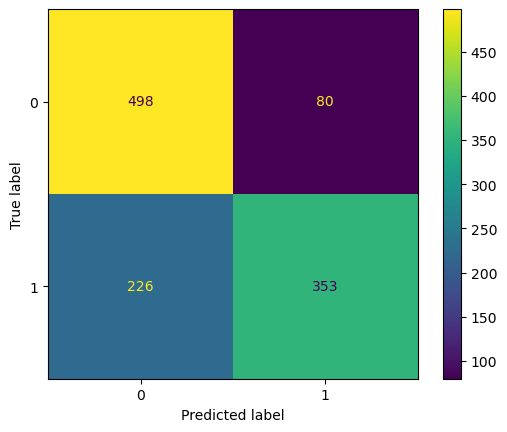

In [231]:
plot_confusion_matrix(model,X_train,y_train)

In [232]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.69      0.86      0.76       578
           1       0.82      0.61      0.70       579

    accuracy                           0.74      1157
   macro avg       0.75      0.74      0.73      1157
weighted avg       0.75      0.74      0.73      1157



In [233]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.6881287726358148


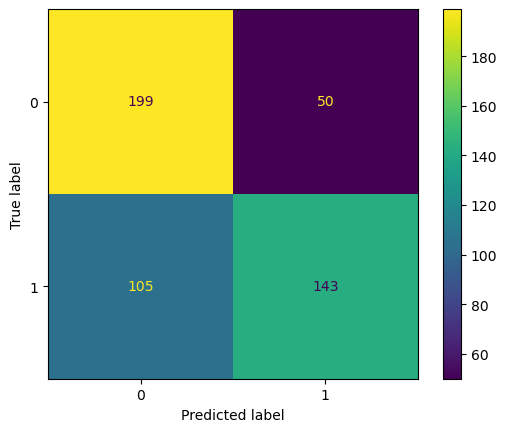

In [234]:
plot_confusion_matrix(model,X_test,y_test)

In [235]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       249
           1       0.74      0.58      0.65       248

    accuracy                           0.69       497
   macro avg       0.70      0.69      0.68       497
weighted avg       0.70      0.69      0.68       497



In [236]:
def valorAbsoluto(num):
    return abs(num)

In [237]:
importances = pd.DataFrame(data={
    'Attribute': feature_names,
    'Importance': model.coef_[0]
})
importances['Importance']=importances['Importance'].apply(valorAbsoluto)
importances = importances.sort_values(by='Importance', ascending=False)

In [238]:
importances

,Attribute,Importance
61,NivelIngles_8,3.456507
62,SemestreEst_1,3.174473
43,Carrera_ingenieria industrial,2.659220
58,NivelIngles_5,2.601508
59,NivelIngles_6,2.497777
36,Carrera_ing de sistemas y computacion,2.476975
60,NivelIngles_7,2.395150
63,SemestreEst_2,2.225762
38,Carrera_ingenieria biomedica,2.067486
44,Carrera_ingenieria mecanica,2.066211


In [239]:
feature_imp = pd.Series(model.coef_[0],index=feature_names).sort_values(ascending=False)
feature_imp

VioHerr_Comp                             0.276909
ProgramoAntes                            0.276838
ScoreExamen                              0.220166
Carrera_derecho                          0.097584
Carrera_medicina                         0.088178
VioOtro                                  0.084397
VioAPO1                                  0.073484
VioAPO2                                  0.072408
TrabajoConArduino                        0.060289
Carrera_historia                         0.056086
TrabajoConPHP                            0.048391
TrabajoConVB                             0.027082
ProgramoEnColegio                        0.024554
Carrera_narrativas digitales             0.000000
TrabajoConC                             -0.037940
TrabajoConHTML                          -0.072246
TrabajoConCMM                           -0.097977
TrabajoConJava                          -0.103722
CursoProgramacionU                      -0.106725
VioTallerPython                         -0.108057


In [240]:
# plt.figure(figsize=(20,30))
# plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
# plt.title('Feature importances obtained from coefficients', size=20)
# plt.xticks(rotation='vertical')
# plt.show()

In [241]:
explainer = shap.Explainer(model, X_train, feature_names=feature_names)
shap_values = explainer(X_test)

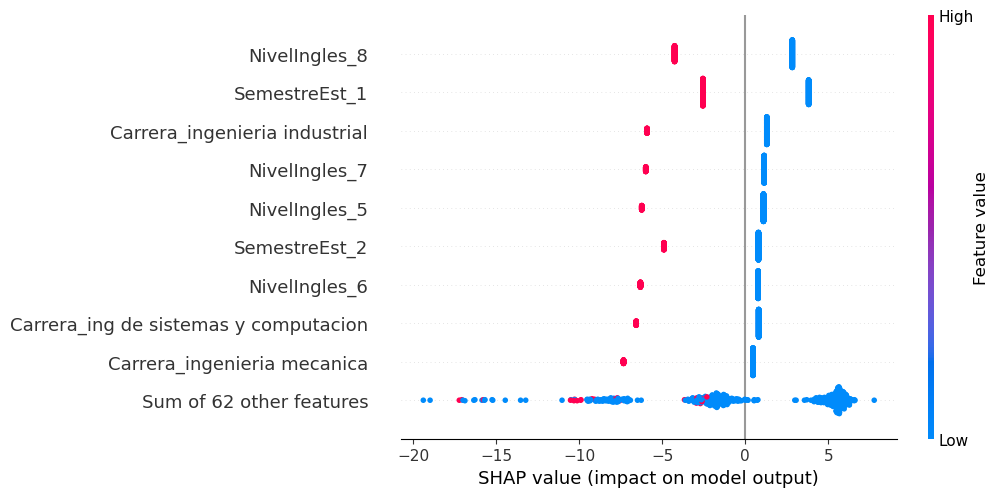

In [242]:
shap.plots.beeswarm(shap_values)

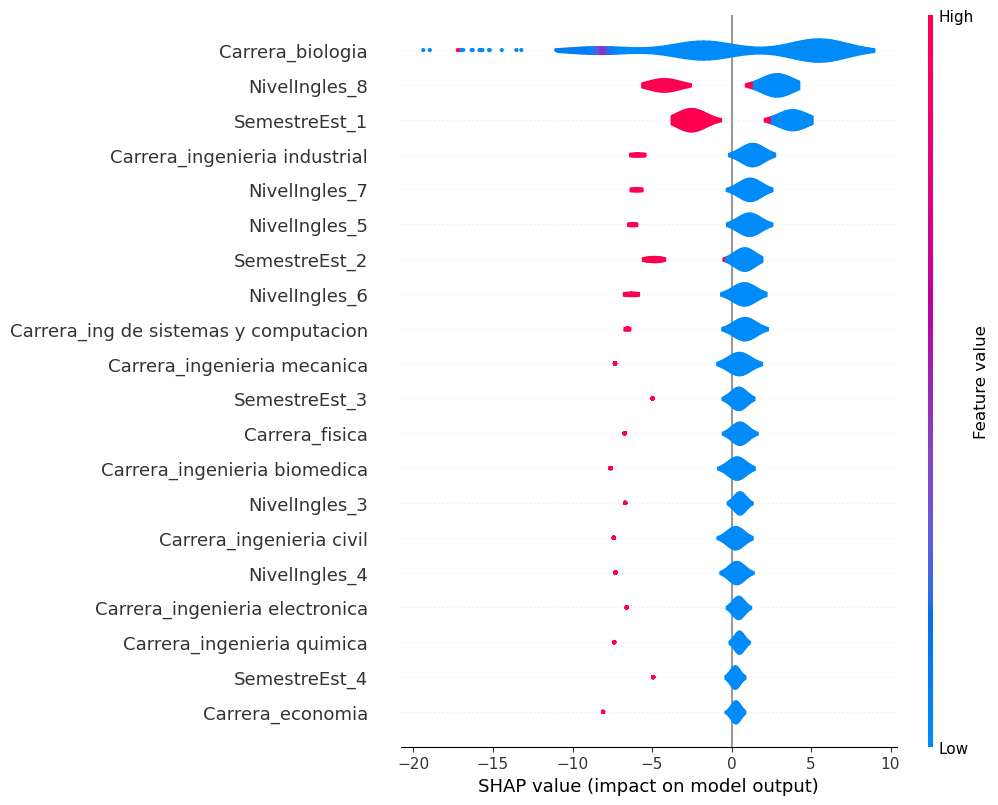

In [243]:
shap.summary_plot(shap_values, plot_type='violin')

## Prueba con OLS

In [244]:
for i in feature_names:
    if " " in i:
        df_final_f_f.rename(columns={i:i.replace(" ","_")},
               inplace=True)

In [245]:
string = ""
for i in df_final_f_f.drop(['PasoONo','n1_global','n2_global','n3_global','n4_global','SemestreAct'],1).columns:
    string=string+ i +"+"
string= string[:-1]
string

'ScoreExamen+ProgramoAntes+CursoProgramacionU+VioAPO1+VioAPO2+VioHerr_Comp+VioTallerPython+VioTallerR+VioIP+VioSAD+VioOtro+ProgramoEnColegio+TrabajoConJava+TrabajoConCMM+TrabajoConC+TrabajoConVB+TrabajoConJavascript+TrabajoConPython+TrabajoConArduino+TrabajoConPHP+TrabajoConHTML+TrabajoConOtro+Carrera_administracion_de_empresas+Carrera_arquitectura+Carrera_arte+Carrera_biologia+Carrera_contaduria_internacional+Carrera_derecho+Carrera_diseño+Carrera_economia+Carrera_estudios_dirigidos+Carrera_filosofia+Carrera_fisica+Carrera_geociencias+Carrera_gobierno_y_asuntos_publicos+Carrera_historia+Carrera_ing_de_sistemas_y_computacion+Carrera_ingenieria_ambiental+Carrera_ingenieria_biomedica+Carrera_ingenieria_civil+Carrera_ingenieria_de_alimentos+Carrera_ingenieria_electrica+Carrera_ingenieria_electronica+Carrera_ingenieria_industrial+Carrera_ingenieria_mecanica+Carrera_ingenieria_quimica+Carrera_lenguas_y_cultura+Carrera_literatura+Carrera_matematicas+Carrera_medicina+Carrera_musica+Carrera_na

In [246]:
lm = smf.ols(formula = 'PasoONo ~ '+string, data=df_final_f_f).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PasoONo   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.800
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           0.000112
Time:                        04:29:03   Log-Likelihood:                -761.56
No. Observations:                1237   AIC:                             1661.
Df Residuals:                    1168   BIC:                             2014.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.2373      0.073      3.252      0.001       0.094       0.380
ScoreExamen                               0.0127      0.006      2.165      0.031       0.001       0.024
ProgramoAntes                             0.0588      0.038      1.567      0.117      -0.015       0.132
CursoProgramacionU                       -0.1221      0.067     -1.832      0.067      -0.253       0.009
VioAPO1                                   0.1807      0.101      1.781      0.075      -0.018       0.380
VioAPO2                                   0.2600      0.258      1.006      0.314      -0.247       0.767
VioHerr_Comp                              0.3176      0.330      0.963      0.336      -0.330       0.965
VioTallerPython                          -0.0768      0.114     -0.676      0.499      -0.300       0.146
VioTallerR                                0.1347      0.225      0.600      0.549      -0.306       0.575
VioIP                                    -0.0612      0.063     -0.967      0.334      -0.185       0.063
VioSAD                                   -0.4937      0.366     -1.348      0.178      -1.212       0.225
VioOtro                                   0.1271      0.040      3.184      0.001       0.049       0.205
ProgramoEnColegio                         0.0247      0.035      0.703      0.482      -0.044       0.094
TrabajoConJava                           -0.0362      0.043     -0.840      0.401      -0.121       0.048
TrabajoConCMM                             0.0113      0.041      0.274      0.784      -0.070       0.092
TrabajoConC                              -0.0377      0.086     -0.438      0.661      -0.206       0.131
TrabajoConVB                              0.0469      0.062      0.754      0.451      -0.075       0.169
TrabajoConJavascript                     -0.1022      0.046     -2.233      0.026      -0.192      -0.012
TrabajoConPython                         -0.0642      0.037     -1.741      0.082      -0.137       0.008
TrabajoConArduino                         0.0320      0.036      0.897      0.370      -0.038       0.102
TrabajoConPHP                             0.1136      0.095      1.192      0.233      -0.073       0.301
TrabajoConHTML                           -0.0181      0.034     -0.530      0.596      -0.085       0.049
TrabajoConOtro                           -0.0649      0.044     -1.488      0.137      -0.150       0.021
Carrera_administracion_de_empresas       -0.0329      0.132     -0.249      0.804      -0.293       0.227
Carrera_arquitectura                      0.3081      0.330      0.934      0.351      -0.339       0.955
Carrera_arte                             -0.0902      0.326     -0.277      0.782      -0.730       0.549
Carrera_b

## Random Forest

### Preparación datos para Random Forest

In [247]:
carreras = pd.get_dummies(df_final.Carrera, prefix='Carrera')

In [248]:
df_final_f_2 = df_final.drop(columns=['Carrera','definitiva_profesor'])

In [249]:
df_final_f_f_2 = pd.concat([df_final_f_2,carreras], axis=1)

In [250]:
df_final_f_f_2=df_final_f_f_2.dropna()

In [251]:
x_drop=df_final_f_f_2.drop(['PasoONo','SemestreAct','n1_global','n2_global','n3_global','n4_global'],1)
# x_drop=df_final_f_f.drop(['PasoONo','SemestreAct'],1)
feature_names= x_drop.columns
X = np.array(x_drop)
y = np.array(df_final_f_f_2['PasoONo'])


### SMOTE 

In [252]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [253]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

### Búsqueda Hiperparámetros

In [254]:
estratos = StratifiedKFold(n_splits=10,random_state=1001,shuffle=True)
arbol = RandomForestClassifier(random_state=1001)
param_grid = {
'n_estimators' : [10,20,50],
'max_features' : ['sqrt', 'log2'],
'max_depth' : [10,50,100],
'min_samples_split': [5,10,20],
'min_samples_leaf': [5,10,20]
}

mejor_modelo = GridSearchCV(arbol, param_grid, cv=estratos, scoring='accuracy',error_score=0)
mejor_modelo.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1001, shuffle=True),
             error_score=0, estimator=RandomForestClassifier(random_state=1001),
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [10, 20, 50]},
             scoring='accuracy')

In [255]:
mejor_modelo.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 50}

In [256]:
 # Obtener el mejor modelo.
model = mejor_modelo.best_estimator_

In [257]:
y_pred=model.predict(X_test)
y_train_pred= model.predict(X_train)

In [258]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7002012072434608


In [259]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       588
           1       0.88      0.74      0.80       569

    accuracy                           0.82      1157
   macro avg       0.83      0.82      0.82      1157
weighted avg       0.83      0.82      0.82      1157



In [260]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72       239
           1       0.77      0.60      0.67       258

    accuracy                           0.70       497
   macro avg       0.71      0.70      0.70       497
weighted avg       0.71      0.70      0.70       497



In [261]:
# Quitar dimensiones, quitar variables dummies.

In [262]:
feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

ScoreExamen                              0.084174
TrabajoConPython                         0.081239
VioOtro                                  0.074663
TrabajoConHTML                           0.059532
SemestreEst                              0.057776
NivelIngles                              0.057290
ProgramoEnColegio                        0.049023
Carrera_ing de sistemas y computacion    0.043658
ProgramoAntes                            0.039850
TrabajoConArduino                        0.037657
Carrera_fisica                           0.036100
TrabajoConJava                           0.035722
VioIP                                    0.032636
Carrera_ingenieria industrial            0.031440
TrabajoConOtro                           0.031309
Carrera_ingenieria civil                 0.025426
Carrera_geociencias                      0.023990
CursoProgramacionU                       0.022617
Carrera_ingenieria mecanica              0.021868
TrabajoConJavascript                     0.021024


# Predicción con examenes de entrada y datos de notas e icfes

## Elección de datos

In [263]:
df_prediccion_casi_todo[['saber_v2']].value_counts()

Series([], dtype: int64)

In [264]:
df_prediccion_casi_todo[['saber_v2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 0 to 1787
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   saber_v2  0 non-null      float64
dtypes: float64(1)
memory usage: 27.9 KB


<p>Mediante la unión de los examenes , encuestas y notas del observatorio no se encuentran evidencias de que hayan registros con datos del icfes , por lo tanto no hay datos de semestres en creditos ni el sexo de la persona</p>